In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import os
import calendar
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy import integrate
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns
sns.set_style("darkgrid")
import random
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, GRU
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv1D, Dropout, MaxPooling1D, LSTM, RepeatVector, Dense, BatchNormalization, Bidirectional
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization
from keras.layers import BatchNormalization
from keras import regularizers
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
from keras.callbacks import ModelCheckpoint
from google.colab import files
from keras.models import load_model
from keras.layers import Reshape

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

In [ ]:
! gdown --id 1hpLgeURe0gdBqEAlqsIH7ZSsIzkuMcAH

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hpLgeURe0gdBqEAlqsIH7ZSsIzkuMcAH
To: /content/piggy_merged_nitrate_data.20230815163319.csv.gz
100% 18.4M/18.4M [00:00<00:00, 70.4MB/s]


In [ ]:
!gunzip -c /content/piggy_merged_nitrate_data.20230815163319.csv.gz > /content/piggy_merged_nitrate_data.20230815163319.csv

In [ ]:
df = pd.read_csv('/content/piggy_merged_nitrate_data.20230815163319.csv', sep='\t')

<ipython-input-4-316af805b826>:1: DtypeWarning: Columns (90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/piggy_merged_nitrate_data.20230815163319.csv', sep='\t')


In [ ]:
import os

# Удаление архивов
os.remove('/content/piggy_merged_nitrate_data.20230815163319.csv.gz')
os.remove('/content/piggy_merged_nitrate_data.20230815163319.csv')

In [ ]:
df = df.drop(463356)

In [ ]:
df = df.drop(['CODMn(a) Anode Tank',
'CODMn(a) #1-out',
'CODMn(a) #2-out',
'CODcr(c) #1-M-out',
'CODcr(c) #2-M-out'], axis=1)

In [ ]:
df['timestamp'] = pd.to_datetime(df['DateTime'], format='%Y/%m/%d %H:%M:%S')

In [ ]:
df = df.drop(['BES1 Cathode',
'BES1 Current',
'BES1 Anode',
'BES1 Total',
'BES2 Cathode',
'BES2 Anode',
'BES2 Total',
'BES2 Temp'], axis=1)

In [ ]:
df = df.drop([
'BES1 Temp'], axis=1)

In [ ]:
df = df.drop([
'NO3-N(c) 500L tank',
'CODcr(c) Cathode Tank',
'CODcr(c) #1-out'], axis=1)

In [ ]:
df = df.drop([
'data logger'], axis=1)

In [ ]:
df = df.drop([
'DateTime'], axis=1)

In [ ]:
df = df.drop([
'NO2-N(a) Anode Tank',
'NO2-N(a) #1-out',
'NH4-N(a) Black Tank',
'NH4-N(a) #1-out',
'pH(c) #1-M-out',
'NO3-N(c) #1-M-out',
'PO4-P(c) #1-M-out',
'NO2-N(c) #1-M-out',
'NH4-N(c) #1-M-out'], axis=1)

In [ ]:
df = df.set_index('timestamp')

In [ ]:
ds1 = df.iloc[14119:2008219, :].copy()

In [ ]:
del df

In [ ]:
# ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Current #1'] = ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Total V #1']/50
# ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Current #1'] = ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Total V #1']/30
# ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Current #1'] = ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Total V #1']/10
# ds1.loc['2023/02/20 12:00':, 'Current #1'] = ds1.loc['2023/02/20 12:00':, 'Total V #1']/5
ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Current #1'] = ds1.loc['2022/12/26 12:00':'2023-01-10 11:59:54', 'Anode #1']/50
ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Current #1'] = ds1.loc['2023/01/10 12:00':'2023-01-19 11:59:50', 'Anode #1']/30
ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Current #1'] = ds1.loc['2023/01/19 12:00':'2023-02-20 11:59:58', 'Anode #1']/10
ds1.loc['2023/02/20 12:00':, 'Current #1'] = ds1.loc['2023/02/20 12:00':, 'Anode #1']/5

In [ ]:
# ds1 = ds1[~ds1.index.duplicated()]
ds1 = ds1[~ds1.index.duplicated(keep='last')]

In [ ]:
for column in ['Temp anode #1', 'Temp anode #2', 'Temp anode storage']:
  ds1[column] = ds1[column].apply(lambda x: 40 if x > 40 else x)
  ds1[column] = ds1[column].apply(lambda x: 10 if x < 10 else x)

In [ ]:
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-09-28 04:58:00') & (ds1.index <= '2022-10-05 01:48:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-10-13 02:47:00') & (ds1.index <= '2022-10-14 08:17:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-12-07 00:02:00') & (ds1.index <= '2022-12-07 23:47:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2022-12-15 17:40:00') & (ds1.index <= '2022-12-16 07:10:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2023-06-17 00:16:00') & (ds1.index <= '2023-06-23 17:30:00')])
ds1 = ds1.drop(ds1.index[(ds1.index >= '2023-07-07 02:00:00') & (ds1.index <= '2023-07-10 19:45:00')])

In [ ]:
ds1.at['2022-10-20 10:17:34', 'COD removal concentration #1-out'] = None
ds1.at['2022-10-20 10:17:34', 'COD removal concentration #2-out'] = None
ds1.at['2022-10-20 10:17:34', 'CODcr(a) #1-out'] = None
ds1.at['2022-10-20 10:17:34', 'CODcr(a) #2-out'] = None
ds1.at['2022-10-20 10:17:34', 'CODcr(a) Anode Tank'] = None

In [ ]:
ds1['COD1'] = ds1['CODcr(a) Anode Tank'] - ds1['CODcr(a) #1-out']
ds1['COD2'] = ds1['CODcr(a) Anode Tank'] - ds1['CODcr(a) #2-out']

In [ ]:
def replace_outliers_with_nearest(df1, columns, multiplier=3):

    for column in df1.columns:
      Q1 = df1[column].quantile(0.25)
      Q3 = df1[column].quantile(0.75)
      IQR = Q3 - Q1


      lower_bound = Q1 - multiplier * IQR
      upper_bound = Q3 + multiplier * IQR


      df1_copy = df1.copy()
      df1_copy.loc[:, column] = df1[column].apply(lambda x: x if lower_bound <= x <= upper_bound else nearest_non_outlier(df1[column], x, lower_bound, upper_bound))
      df1.loc[:, column] = df1_copy.loc[:, column]

    return df1

def nearest_non_outlier(series, value, lower_bound, upper_bound):

    lower_distance = value - lower_bound
    upper_distance = upper_bound - value

    if lower_distance < upper_distance:
        return lower_bound
    else:
        return upper_bound

df2 = ds1[['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2']].copy()
for j in range(1, ds1.asfreq('D').index.size):
  df2.loc[df2.asfreq('D').index[j - 1]:df2.asfreq('D').index[j], ['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2']] = replace_outliers_with_nearest(df2.loc[df2.asfreq('D').index[j - 1]:df2.asfreq('D').index[j],
   ['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2']],
    ['Temp anode storage', 'Current #1', 'Temp anode #1', 'Anode #1', 'Cathode #1', 'Total V #1', 'Current #2', 'Temp anode #2', 'Anode #2', 'Cathode #2', 'Total V #2'])

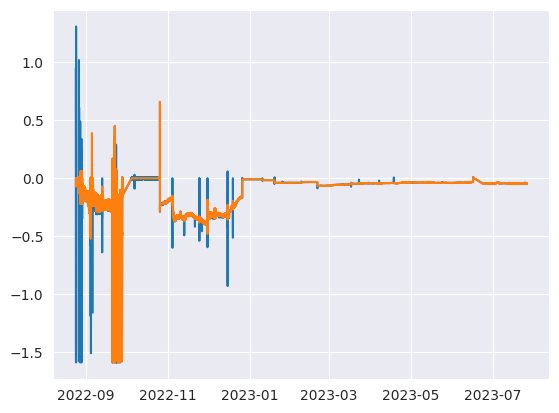

In [ ]:
plt.plot(ds1['Current #1'])
plt.plot(df2['Current #1'])

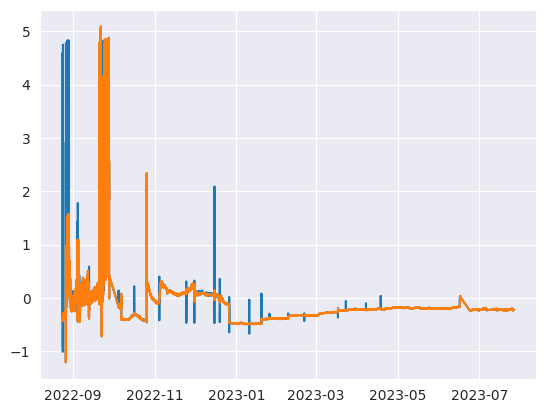

In [ ]:
plt.plot(ds1['Anode #1'])
plt.plot(df2['Anode #1'])

In [ ]:
ds2 = ds1.copy()

In [ ]:
ds2 = ds2.drop('note', axis=1)

In [ ]:
for column in ['COD1', 'COD2', 'CODcr(a) #1-out', 'CODcr(a) #2-out', 'CODcr(a) Anode Tank',
               'pH(a) Anode Tank', 'pH(a) #1-out', 'pH(a) #2-out',
               'PO4(a) Anode Tank', 'PO4(a) #1-out', 'PO4(a) #2-out',
               'pH(c) Cathode Tank', 'pH(c) #1-out', 'pH(c) #2-out',
               'NO3-N(c) Cathode Tank', 'NO3-N(c) #1-out',  'NO3-N(c) #2-out',
               'PO4-P(c) Cathode Tank', 'PO4-P(c) #2-out', 'PO4-P(c) #1-out',
               'NO2-N(c) Cathode Tank',  'NO2-N(c) #2-out', 'NO2-N(c) #1-out', 'NH4-N(c) Cathode Tank',  'NH4-N(c) #2-out',
               'NH4-N(c) #1-out']:
  ds2[column].iloc[0] =  ds2[column].dropna().iloc[0]
  ds2[f"inter" + column] = ds2[column].fillna(method='ffill')

In [ ]:
for i in ds2.columns:
  ds2[i].iloc[0] =  ds2[i].dropna().iloc[0]
  ds2[i] =  ds2[i].interpolate()

In [ ]:
df2 = df2.add_prefix('out')
for i in df2.columns:
  df2[i].iloc[0] =  df2[i].dropna().iloc[0]
  df2[i] =  df2[i].interpolate()

In [ ]:
result = pd.concat([ds2, df2], axis=1)

In [ ]:
result = pd.concat([ds2, df2], axis=1)
result['COD nan'] = ds1['CODcr(a) Anode Tank']
ds30 = result.resample('20T').mean()
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-09-28 04:58:00') & (ds30.index <= '2022-10-05 01:48:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-10-13 02:47:00') & (ds30.index <= '2022-10-14 08:17:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-07 00:02:00') & (ds30.index <= '2022-12-07 23:47:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-15 17:40:00') & (ds30.index <= '2022-12-16 07:10:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-06-17 00:16:00') & (ds30.index <= '2023-06-23 17:30:00')])
# ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-07-07 02:00:00') & (ds30.index <= '2023-07-10 19:45:00')])

<ipython-input-32-3a64bbd221ca>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result['COD nan'] = ds1['CODcr(a) Anode Tank']


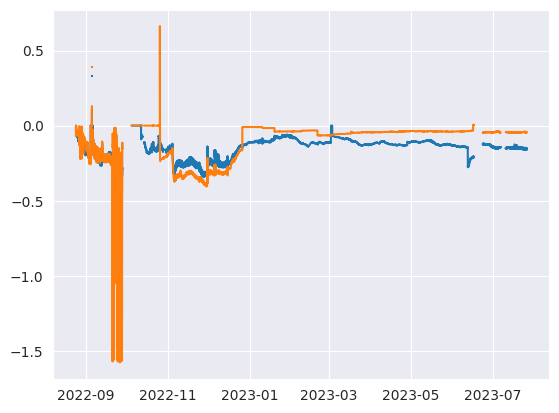

In [ ]:
plt.plot(ds30['outCurrent #2'])
plt.plot(ds30['outCurrent #1'])

In [ ]:
K = ds30.index.to_series().diff().dt.total_seconds()
K.iloc[0] = K.iloc[1]

print(K)

timestamp
2022-08-24 13:00:00    1200.0
2022-08-24 13:20:00    1200.0
2022-08-24 13:40:00    1200.0
2022-08-24 14:00:00    1200.0
2022-08-24 14:20:00    1200.0
                        ...  
2023-07-26 11:40:00    1200.0
2023-07-26 12:00:00    1200.0
2023-07-26 12:20:00    1200.0
2023-07-26 12:40:00    1200.0
2023-07-26 13:00:00    1200.0
Freq: 20T, Name: timestamp, Length: 24193, dtype: float64


<ipython-input-39-0914ce0c27e0>:2: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  K.iloc[0] = K.iloc[1]


In [ ]:
ds30['multipy'] = K * ds30['outCurrent #2']

In [ ]:
ds30['multipy'] = K * ds30['BES2 Current']

In [ ]:
ds30['multipy']

timestamp
2022-08-24 13:00:00    -48.00000
2022-08-24 13:20:00    -48.00000
2022-08-24 13:40:00    -47.80000
2022-08-24 14:00:00    -47.20000
2022-08-24 14:20:00    -47.40000
                         ...    
2023-07-26 11:40:00   -181.58000
2023-07-26 12:00:00   -183.90000
2023-07-26 12:20:00   -186.06000
2023-07-26 12:40:00   -188.34000
2023-07-26 13:00:00   -189.80339
Freq: 20T, Name: multipy, Length: 24193, dtype: float64

In [ ]:
ds30['multipy'].groupby(ds30.index.date).cumsum()[100:112]

timestamp
2022-08-25 22:20:00   -4949.4
2022-08-25 22:40:00   -5045.4
2022-08-25 23:00:00   -5141.4
2022-08-25 23:20:00   -5237.4
2022-08-25 23:40:00   -5333.2
2022-08-26 00:00:00     -91.4
2022-08-26 00:20:00    -178.6
2022-08-26 00:40:00    -262.8
2022-08-26 01:00:00    -359.2
2022-08-26 01:20:00    -455.8
2022-08-26 01:40:00    -551.8
2022-08-26 02:00:00    -647.8
Name: multipy, dtype: float64

In [ ]:
ds30.index.date

array([datetime.date(2022, 8, 24), datetime.date(2022, 8, 24),
       datetime.date(2022, 8, 24), ..., datetime.date(2023, 7, 26),
       datetime.date(2023, 7, 26), datetime.date(2023, 7, 26)],
      dtype=object)

In [ ]:
ds30['NO3-N(c) Cathode Tank']

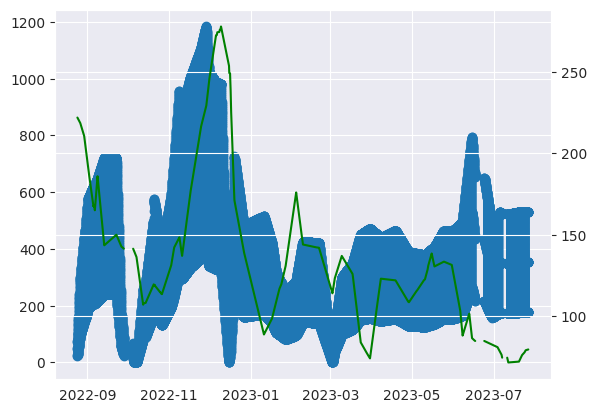

In [ ]:
fig, ax = plt.subplots()
ax.plot(ds30['multipy'].abs().groupby(pd.Grouper(freq='1H')).cumsum(), marker='o')
ax1 = ax.twinx()
ax1.plot(ds30['NO3-N(c) Cathode Tank'], color='green')

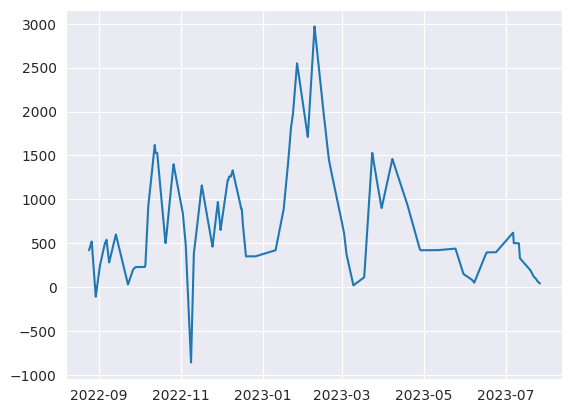

In [ ]:
plt.plot(ds30['COD2'])

In [ ]:
K.max()

1200.0

In [ ]:
ds30['charge'] = ds30['multipy'].groupby(pd.Grouper(freq='1D')).cumsum()

In [ ]:
ds30['missing_data_flag'] = 0
ds30.loc[(ds30.index >= '2022-09-28 04:58:00') & (ds30.index <= '2022-10-05 01:48:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2022-10-13 02:47:00') & (ds30.index <= '2022-10-14 08:17:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2022-12-07 00:02:00') & (ds30.index <= '2022-12-07 23:47:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2022-12-15 17:40:00') & (ds30.index <= '2022-12-16 07:10:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2023-06-17 00:16:00') & (ds30.index <= '2023-06-23 17:30:00'), 'missing_data_flag'] = 1
ds30.loc[(ds30.index >= '2023-07-07 02:00:00') & (ds30.index <= '2023-07-10 19:45:00'),  'missing_data_flag'] = 1
ds30 = ds30.interpolate()

In [ ]:
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-09-28 04:58:00') & (ds30.index <= '2022-10-05 01:48:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-10-13 02:47:00') & (ds30.index <= '2022-10-14 08:17:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-07 00:02:00') & (ds30.index <= '2022-12-07 23:47:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2022-12-15 17:40:00') & (ds30.index <= '2022-12-16 07:10:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-06-17 00:16:00') & (ds30.index <= '2023-06-23 17:30:00')])
ds30 = ds30.drop(ds30.index[(ds30.index >= '2023-07-07 02:00:00') & (ds30.index <= '2023-07-10 19:45:00')])
ds30 = ds30.interpolate()

In [ ]:
ds22 = ds30['COD nan'].copy()

In [ ]:
ds22

timestamp
2022-08-24 13:00:00    1610.0
2022-08-24 13:20:00       NaN
2022-08-24 13:40:00       NaN
2022-08-24 14:00:00       NaN
2022-08-24 14:20:00       NaN
                        ...  
2023-07-26 11:40:00       NaN
2023-07-26 12:00:00       NaN
2023-07-26 12:20:00       NaN
2023-07-26 12:40:00       NaN
2023-07-26 13:00:00    1560.0
Freq: 20T, Name: COD nan, Length: 24193, dtype: float64

In [ ]:
ds30['hours_of_day'] = ds30.index.hour
ds30 = pd.get_dummies(ds30, columns=['hours_of_day'], prefix='hour')

In [ ]:
ds30['day_of_week'] = ds30.index.dayofweek
ds30 = pd.get_dummies(ds30, columns=['day_of_week'], prefix='day')

In [ ]:
for column in ['Temp anode #1', 'Temp anode #2', 'Temp anode storage']:
  ds30[column] = ds30[column].apply(lambda x: 40 if x > 40 else x)
  ds30[column] = ds30[column].apply(lambda x: 10 if x < 10 else x)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

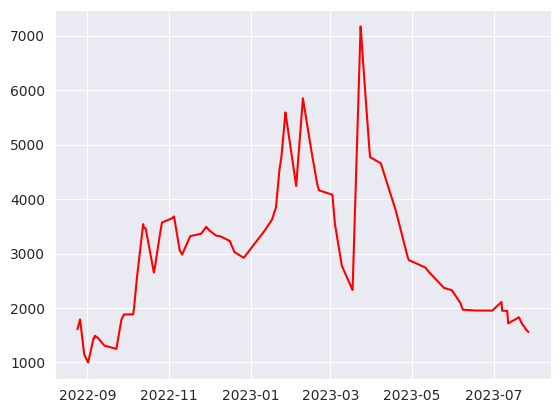

In [ ]:
plt.plot(ds30['CODcr(a) Anode Tank'].dropna(), color='red')

Text(0, 0.5, 'Абсолютные значения outCurrent #2')

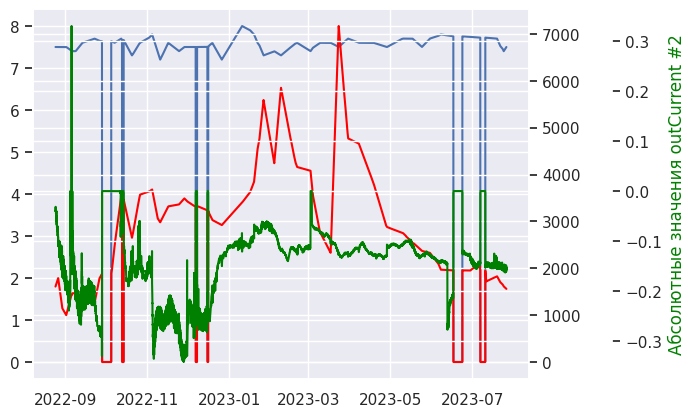

In [ ]:
fig, ax = plt.subplots()
ax.plot(ds30['pH(a) Anode Tank'].dropna())
ax1 = ax.twinx()
ax1.plot(ds30['CODcr(a) Anode Tank'].dropna(), color='red')

ax2 = ax.twinx()
ax2.plot(ds30['outCurrent #2'], color='green')
ax2.spines['right'].set_position(('outward', 60))
ax2.set_ylabel('Абсолютные значения outCurrent #2', color='green')

In [ ]:
ds1['CODcr(a) #1-out'].mean(), ds1['CODcr(a) #2-out'].mean()

(2321.5106382978724, 2271.1063829787236)

In [ ]:
ds1['CODcr(a) #1-out'].min(), ds1['CODcr(a) #2-out'].min()

(761.0, 710.0)

In [ ]:
ds1['CODcr(a) #1-out'].max(), ds1['CODcr(a) #2-out'].max()

(4840.0, 5640.0)

In [ ]:
ds111 = ds30[['COD2', 'CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #2-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #2-out',
       'interpH(c) Cathode Tank',  'interpH(c) #2-out',
       'interNO3-N(c) Cathode Tank',
       'interNO3-N(c) #2-out', 'interPO4-P(c) Cathode Tank',
       'interPO4-P(c) #2-out', 'interNO2-N(c) Cathode Tank',
       'interNO2-N(c) #2-out', 'interNH4-N(c) Cathode Tank',
       'interNH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cathode pump #2', 'Anode pump#2',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cathode pump #2', 'Anode pump#2',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD1', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #1-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #1-out',
       'interpH(c) Cathode Tank',  'interpH(c) #1-out',
       'interNO3-N(c) Cathode Tank',
       'interNO3-N(c) #1-out', 'interPO4-P(c) Cathode Tank',
       'interPO4-P(c) #1-out', 'interNO2-N(c) Cathode Tank',
       'interNO2-N(c) #1-out', 'interNH4-N(c) Cathode Tank',
       'interNH4-N(c) #1-out', 'outTemp anode storage',
  'outCurrent #1', 'outTemp anode #1', 'outAnode #1',
       'outCathode #1', 'Cathode pump #1', 'Anode pump #1',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

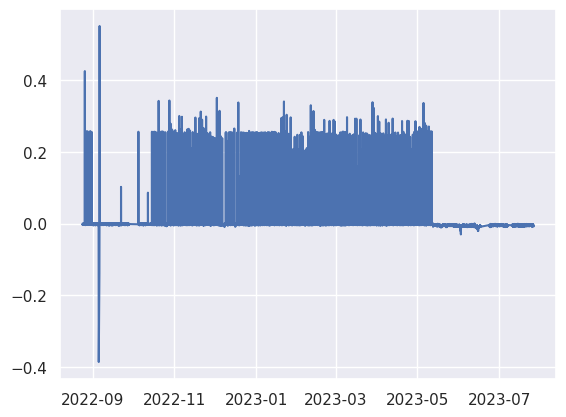

In [ ]:
plt.plot(ds111['sludge mixing pump'])

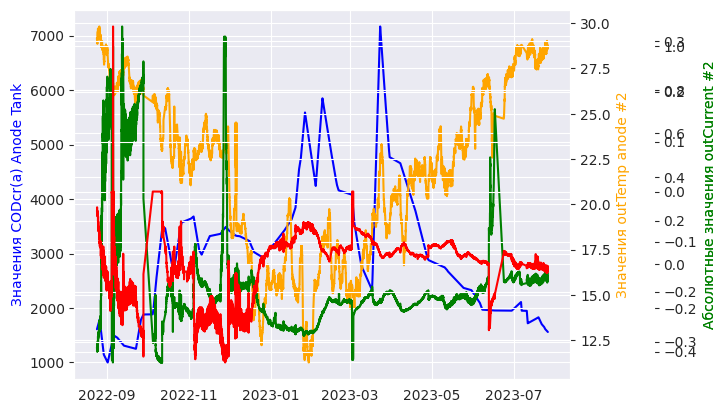

In [ ]:
fig, ax = plt.subplots()
ax.plot(ds111['CODcr(a) Anode Tank'], color='blue')
ax.set_ylabel('Значения CODcr(a) Anode Tank', color='blue')

ax1 = ax.twinx()
ax1.plot(ds111['outTemp anode #2'], color='orange')
ax1.set_ylabel('Значения outTemp anode #2', color='orange')

ax2 = ax.twinx()
ax2.plot(ds111['outAnode #2'], color='green')
ax2.spines['right'].set_position(('outward', 60))
ax2.set_ylabel('Абсолютные значения outCurrent #2', color='green')

ax3 = ax.twinx()
ax3.plot(ds111['outCurrent #2'], color='red')
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Абсолютные значения outCurrent #2', color='green')

plt.show()

<Axes: >

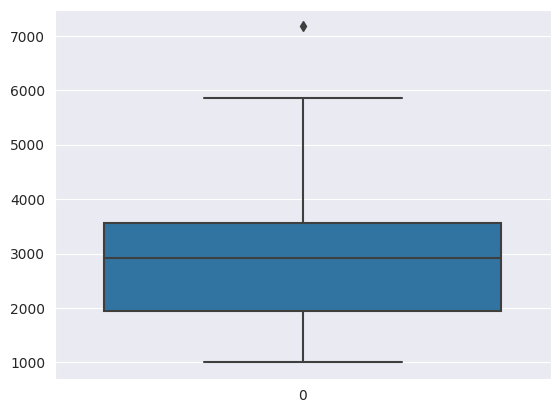

In [ ]:
sns.boxplot(ds1['CODcr(a) Anode Tank'].dropna())

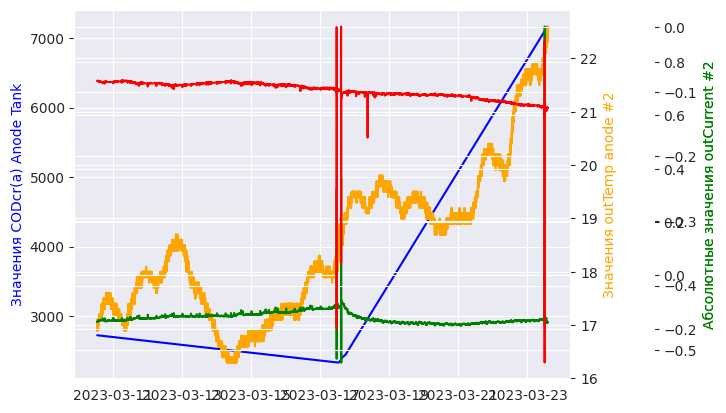

In [ ]:
fig, ax = plt.subplots()
ax.plot(ds111['CODcr(a) Anode Tank'].loc['2023-03-10 13:10:37':'2023-03-23 14:10:31'], color='blue')
ax.set_ylabel('Значения CODcr(a) Anode Tank', color='blue')

ax1 = ax.twinx()
ax1.plot(ds2['Temp anode #2'].loc['2023-03-10 13:10:37':'2023-03-23 14:10:31'], color='orange')
ax1.set_ylabel('Значения outTemp anode #2', color='orange')

ax2 = ax.twinx()
ax2.plot(ds2['Anode #2'].loc['2023-03-10 13:10:37':'2023-03-23 14:10:31'], color='green')
ax2.spines['right'].set_position(('outward', 60))
ax2.set_ylabel('Абсолютные значения outCurrent #2', color='green')

ax3 = ax.twinx()
ax3.plot(ds2['Current #2'].loc['2023-03-10 13:10:37':'2023-03-23 14:10:31'], color='red')
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Абсолютные значения outCurrent #2', color='green')

plt.show()

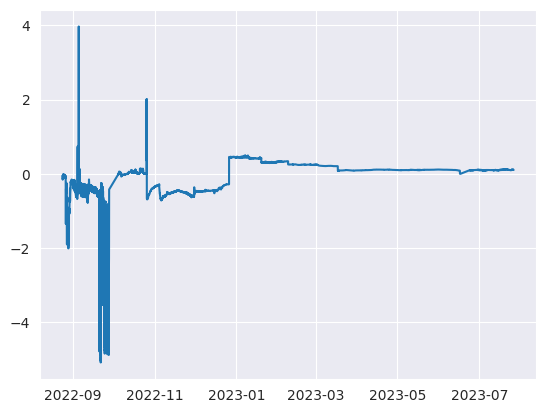

In [ ]:
plt.plot(ds111['outTotal V #1'])

In [ ]:
ds111['CODcr(a) Anode Tank'].dropna().loc['2023-03-17 13:10:37':'2023-03-23 14:10:31']

timestamp
2023-03-20 13:20:00    4721.977556
2023-03-20 13:40:00    4733.095404
2023-03-20 14:00:00    4744.349946
2023-03-20 14:20:00    4755.604489
2023-03-20 14:40:00    4766.722336
                          ...     
2023-03-23 12:40:00    7125.574175
2023-03-23 13:00:00    7136.692022
2023-03-23 13:20:00    7147.718740
2023-03-23 13:40:00    7158.745458
2023-03-23 14:00:00    7167.963234
Name: CODcr(a) Anode Tank, Length: 219, dtype: float64

In [ ]:
ds1['CODcr(a) Anode Tank'].dropna()

timestamp
2022-08-24 13:19:38    1610.0
2022-08-26 13:19:49    1790.0
2022-08-29 13:19:49    1150.0
2022-09-01 13:19:49    1000.0
2022-09-06 13:19:41    1490.0
2022-09-08 13:19:41    1460.0
2022-09-13 13:19:34    1310.0
2022-09-22 14:17:31    1250.0
2022-10-05 13:19:44    1950.0
2022-10-07 13:19:39    2480.0
2022-10-12 13:19:44    3540.0
2022-10-20 13:17:34    2650.0
2022-10-26 12:45:32    3570.0
2022-11-04 13:35:33    3680.0
2022-11-08 13:35:39    3070.0
2022-11-10 13:35:30    2980.0
2022-11-16 13:35:30    3320.0
2022-11-24 13:35:34    3360.0
2022-11-28 13:35:44    3490.0
2022-11-30 13:35:40    3430.0
2022-12-09 13:35:33    3310.0
2022-12-15 12:35:33    3240.0
2022-12-19 11:21:32    3030.0
2022-12-26 11:21:36    2920.0
2023-01-10 13:21:34    3400.0
2023-01-19 11:47:46    3840.0
2023-01-26 13:47:31    5590.0
2023-02-03 13:47:31    4240.0
2023-02-08 14:10:31    5850.0
2023-02-20 14:10:30    4160.0
2023-03-02 14:10:31    4080.0
2023-03-09 13:10:31    2780.0
2023-03-17 13:10:37    2330.0


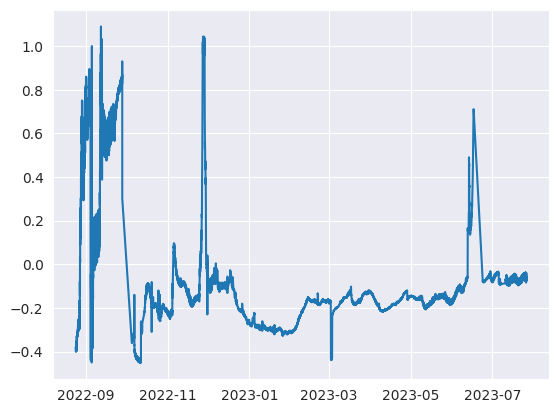

In [ ]:
plt.plot(ds30['outAnode #2'])

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #2-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #2-out',
  'interpH(c) #2-out', 'interNO2-N(c) Cathode Tank',
       'interNO2-N(c) #2-out',
       'interNH4-N(c) #2-out', 'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
       'outCathode #2', 'Cathode pump #2', 'Anode pump#2',
              'sludge mixing pump',  'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank',
       'outTemp anode storage', 'outTemp anode #2', 'outAnode #2']].copy()

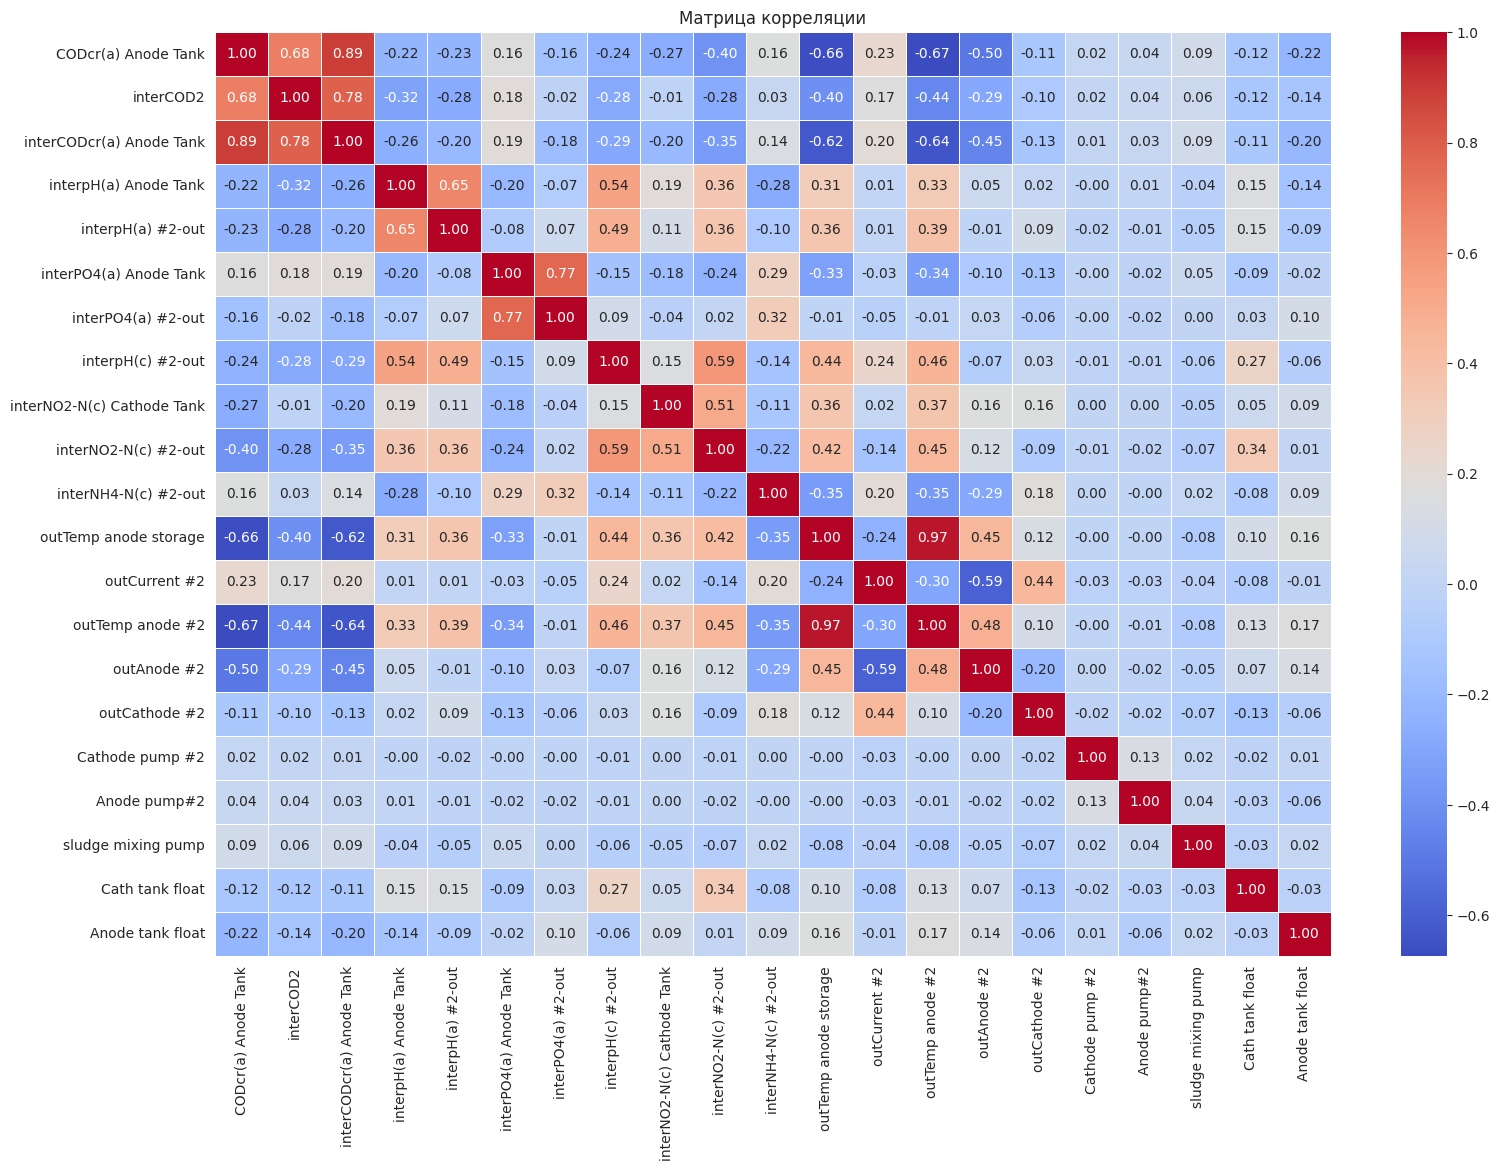

In [ ]:
correlation_matrix = ds111.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

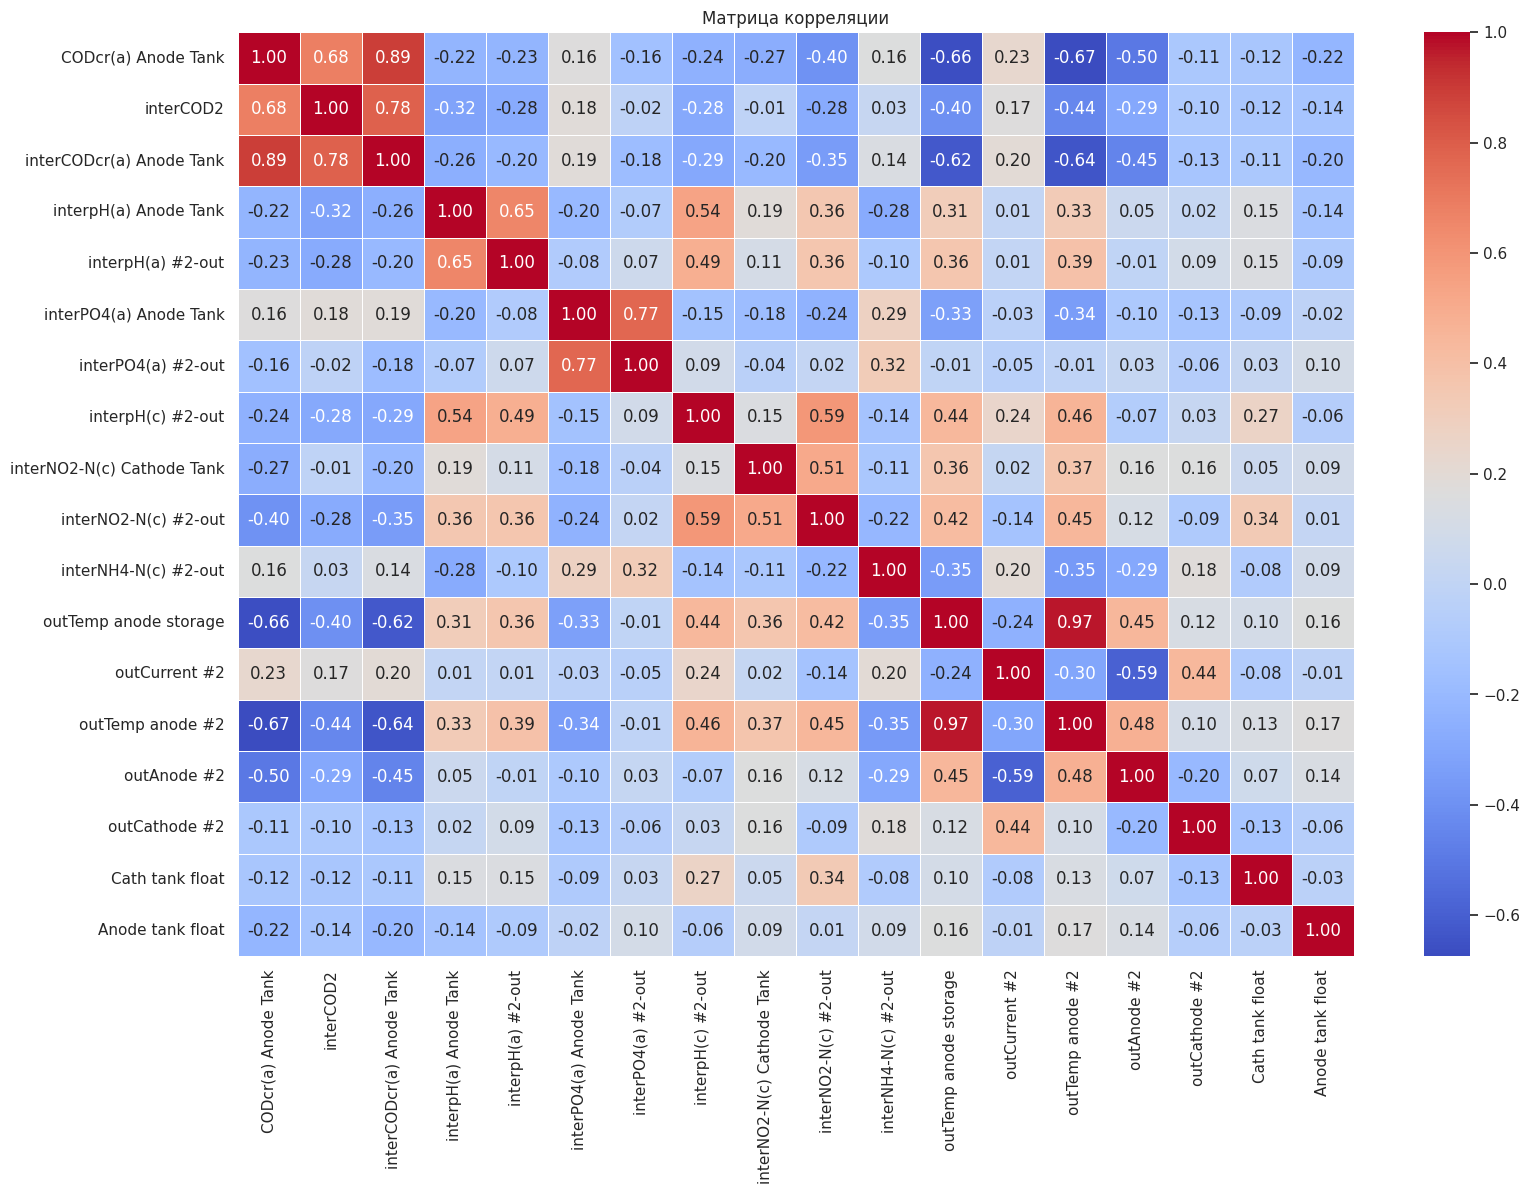

In [ ]:
correlation_matrix = ds111.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

In [ ]:
ds30['hours_of_day'] = ds30.index.hour
ds30 = pd.get_dummies(ds30, columns=['hours_of_day'], prefix='hour')

In [ ]:
ds30['day_of_week'] = ds30.index.dayofweek
ds30 = pd.get_dummies(ds30, columns=['day_of_week'], prefix='day')

In [ ]:
ds30['month'] = ds30.index.month
ds30 = pd.get_dummies(ds30, columns=['month'], prefix='month')

In [ ]:
ds112 = ds1d[['CODcr(a) Anode Tank']].copy()
ds111 = ds30[['outCurrent #2', 'outTemp anode #2', 'outAnode #2']].copy()

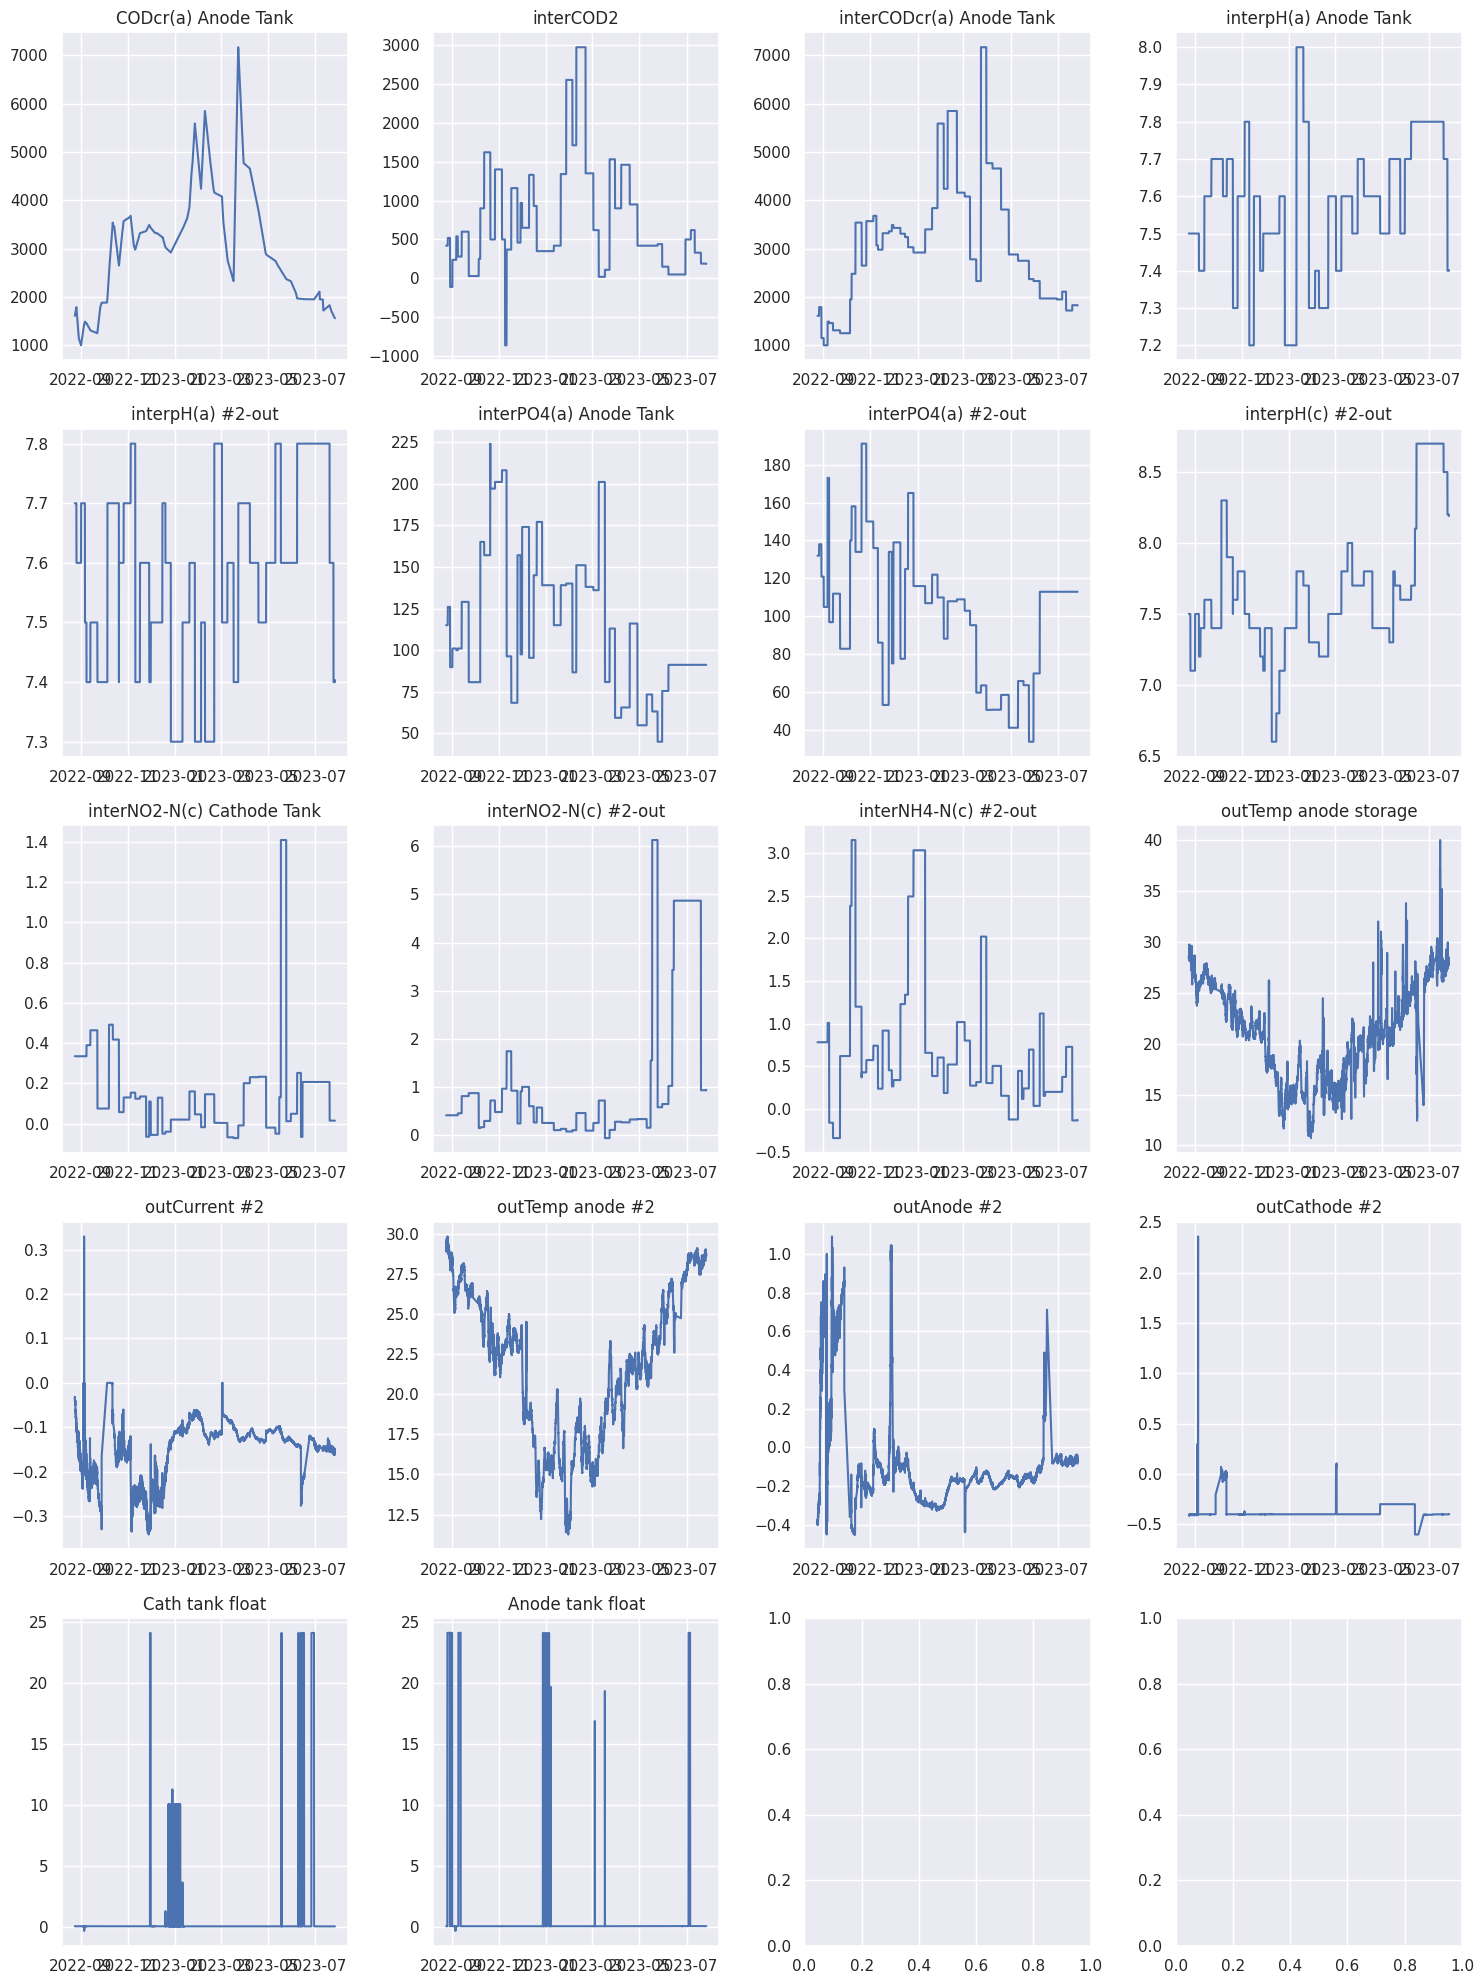

In [ ]:
sns.set()
columns = ds111.columns


num_cols = 4
num_rows = (len(columns) - 1) // num_cols + 1


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)


for i, column in enumerate(columns):
    ax = axes.flat[i] if num_rows > 1 else axes[i]
    ax.plot(ds111[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',
       'interPO4(a) Anode Tank',
 'interNO2-N(c) Cathode Tank',
       'interNH4-N(c) #2-out',
 'outTemp anode #2', 'outAnode #2',
       'outCathode #2',   'Cath tank float',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #2-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #2-out',
  'outTemp anode storage',
  'outCurrent #2', 'outTemp anode #2', 'outAnode #2',
              'Anode tank float']].copy()

In [ ]:
ds111 = ds30[['CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank',  'interpH(a) #2-out',
       'interPO4(a) Anode Tank',  'interPO4(a) #2-out',
       'outTemp anode #2', 'outAnode #2',
              'Anode tank float']].copy()

In [ ]:
def data_create(_df):
  return np.stack(_df.values, axis=0)
data1 = data_create(ds111)

In [ ]:
def train_val_test_split(data, train_ratio=0.8, val_ratio=0.1):

    train_size = int(train_ratio * data.shape[0])
    val_size = int(val_ratio * data.shape[0])
    test_size = data.shape[0] - train_size - val_size


    train_data = data[:train_size, :]
    val_data = data[train_size:train_size+val_size, :]
    test_data = data[train_size+val_size:, :]

    return train_data, val_data, test_data


train_data1, val_data1, test_data1 = train_val_test_split(data1)

In [ ]:
scaler = MinMaxScaler()

train_normalized1 = scaler.fit_transform(train_data1)
val_normalized1 = scaler.transform(val_data1)
test_normalized1 = scaler.transform(test_data1)

In [ ]:
3*24*7

504

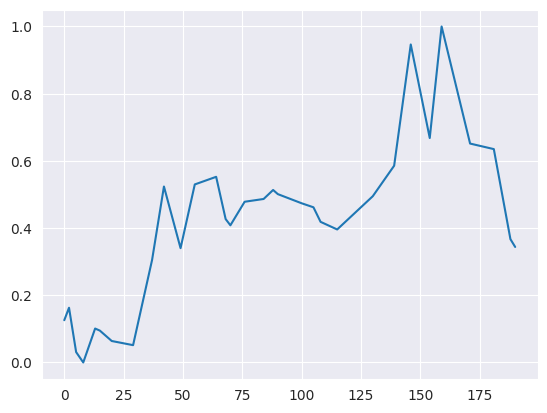

In [ ]:
plt.plot(train_normalized2)

In [ ]:
data1.shape, data2.shape

((22744, 3), (319, 1))

In [ ]:
data2[7, 0]

1050.0

In [ ]:
data2[:7, 0]

array([1610.        , 1700.        , 1790.        , 1576.66666667,
       1363.33333333, 1150.        , 1100.        ])

In [ ]:
val_normalized2.shape

(63, 1)

In [ ]:
72*3

216

In [ ]:
72*7

504

In [ ]:
del result

In [ ]:
72*5

360

In [ ]:
window_size = 512
forecast_horizon = 72
step =  72
features = 1

def create_sequences(data, window_size, step, forecast_horizon):
    X = []
    y1 = []
    for i in range(0, len(data) - window_size - forecast_horizon + 1, step):
        X.append(data[i:i+window_size, 1:])
        y_row = []
        for j in range(features):
          y_row.append(data[i+window_size+forecast_horizon - 1, j])
        y1.append(y_row)
    return np.array(X), np.array(y1)

X_train, y_train1 = create_sequences(train_normalized1, window_size, step, forecast_horizon)
X_val, y_val1 = create_sequences(val_normalized1, window_size, step, forecast_horizon)
X_test, y_test1 = create_sequences(test_normalized1, window_size, step, forecast_horizon)

y_train1 = y_train1.reshape(y_train1.shape[0], features)
y_val1 = y_val1.reshape(y_val1.shape[0], features)
y_test1 = y_test1.reshape(y_test1.shape[0], features)

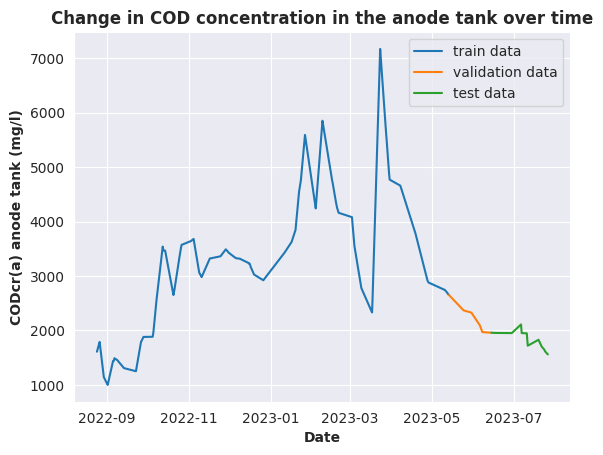

In [ ]:
i = 0
tr = train_normalized1[:, i].size
val = tr + val_normalized1[:, i].size
ts = val + test_normalized1[:, i].size

plt.plot(ds30.index[:tr], train_normalized1[:, i] * (scaler.data_max_[i] - scaler.data_min_[i]) + scaler.data_min_[i], label='train data')
plt.plot(ds30.index[tr:val], val_normalized1[:, i] * (scaler.data_max_[i] - scaler.data_min_[i]) + scaler.data_min_[i], label='validation data')
plt.plot(ds30.index[val:ts], test_normalized1[:, i] * (scaler.data_max_[i] - scaler.data_min_[i]) + scaler.data_min_[i], label='test data')
plt.ylabel('CODcr(a) anode tank (mg/l)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.title('Change in COD concentration in the anode tank over time', fontweight='bold')
plt.legend()

In [ ]:
ds1['CODcr(a) Anode Tank'].dropna()

timestamp
2022-08-24 13:19:38    1610.0
2022-08-26 13:19:49    1790.0
2022-08-29 13:19:49    1150.0
2022-09-01 13:19:49    1000.0
2022-09-06 13:19:41    1490.0
2022-09-08 13:19:41    1460.0
2022-09-13 13:19:34    1310.0
2022-09-22 14:17:31    1250.0
2022-10-05 13:19:44    1950.0
2022-10-07 13:19:39    2480.0
2022-10-12 13:19:44    3540.0
2022-10-20 13:17:34    2650.0
2022-10-26 12:45:32    3570.0
2022-11-04 13:35:33    3680.0
2022-11-08 13:35:39    3070.0
2022-11-10 13:35:30    2980.0
2022-11-16 13:35:30    3320.0
2022-11-24 13:35:34    3360.0
2022-11-28 13:35:44    3490.0
2022-11-30 13:35:40    3430.0
2022-12-09 13:35:33    3310.0
2022-12-15 12:35:33    3240.0
2022-12-19 11:21:32    3030.0
2022-12-26 11:21:36    2920.0
2023-01-10 13:21:34    3400.0
2023-01-19 11:47:46    3840.0
2023-01-26 13:47:31    5590.0
2023-02-03 13:47:31    4240.0
2023-02-08 14:10:31    5850.0
2023-02-20 14:10:30    4160.0
2023-03-02 14:10:31    4080.0
2023-03-09 13:10:31    2780.0
2023-03-17 13:10:37    2330.0


In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(100, return_sequences=True)(input_layer)
drop1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(50)(drop1)
repeat = RepeatVector(10)(lstm2)
lstm3= LSTM(50, return_sequences=True)(repeat)
drop2 = Dropout(0.1)(lstm3)
lstm3= LSTM(100)(drop2)
drop3 = Dropout(0.2)(lstm3)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
31/31 - 10s - loss: 0.0917 - mae: 0.2325 - mape: 2967.0698 - val_loss: 0.0589 - val_mae: 0.2043 - val_mape: 45.1619 - 10s/epoch - 312ms/step
Epoch 2/500
31/31 - 1s - loss: 0.0252 - mae: 0.1253 - mape: 167.8883 - val_loss: 0.0511 - val_mae: 0.1844 - val_mape: 41.5196 - 951ms/epoch - 31ms/step
Epoch 3/500
31/31 - 2s - loss: 0.0217 - mae: 0.1186 - mape: 363.9298 - val_loss: 0.0513 - val_mae: 0.1791 - val_mape: 36.5695 - 2s/epoch - 55ms/step
Epoch 4/500
31/31 - 2s - loss: 0.0190 - mae: 0.1082 - mape: 214.1238 - val_loss: 0.0504 - val_mae: 0.1767 - val_mape: 35.7438 - 2s/epoch - 57ms/step
Epoch 5/500
31/31 - 1s - loss: 0.0177 - mae: 0.1053 - mape: 605.3818 - val_loss: 0.0549 - val_mae: 0.1806 - val_mape: 34.4832 - 1s/epoch - 33ms/step
Epoch 6/500
31/31 - 1s - loss: 0.0168 - mae: 0.0995 - mape: 332.3453 - val_loss: 0.0517 - val_mae: 0.1727 - val_mape: 32.6662 - 873ms/epoch - 28ms/step
Epoch 7/500
31/31 - 1s - loss: 0.0173 - mae: 0.1010 - mape: 377.9061 - val_loss: 0.0492 - val_ma

In [ ]:
from keras.layers import Input, Dense, LSTM, Bidirectional, Concatenate, Attention

In [ ]:
del ds1
del xv
del x

In [ ]:
x = X_test.copy()
predicted1 = np.array([])
predicted2 = np.array([])

for i in range(x.shape[0]):
    prediction = model.predict(x[i, :, :].reshape(1, window_size, data1.shape[1]))  # Получаем прогноз для текущего окна

    # Заменяем прогнозированные значения в x
    if i < x.shape[0] - forecast_horizon:
        # x[i+1, :-1, 0] = xv[i, 1:, 0]  # Обновляем значения второго столбца следующего окна из первого столбца текущего окна
        # x[i+1, :-1, 1] = xv[i, 1:, 1]  # Обновляем значения второго столбца следующего окна из первого столбца текущего окна
        x[i+forecast_horizon, :-1, :] = x[i+forecast_horizon-1, 1:, :]
        x[i+forecast_horizon, -1, 0] = prediction

1/1 [==============================] - 0s 19ms/step


In [ ]:
ds1['CODcr(a) Anode Tank'].dropna().index

DatetimeIndex(['2022-08-24 13:19:38', '2022-08-26 13:19:49',
               '2022-08-29 13:19:49', '2022-09-01 13:19:49',
               '2022-09-06 13:19:41', '2022-09-08 13:19:41',
               '2022-09-13 13:19:34', '2022-09-22 14:17:31',
               '2022-10-05 13:19:44', '2022-10-07 13:19:39',
               '2022-10-12 13:19:44', '2022-10-20 13:17:34',
               '2022-10-26 12:45:32', '2022-11-04 13:35:33',
               '2022-11-08 13:35:39', '2022-11-10 13:35:30',
               '2022-11-16 13:35:30', '2022-11-24 13:35:34',
               '2022-11-28 13:35:44', '2022-11-30 13:35:40',
               '2022-12-09 13:35:33', '2022-12-15 12:35:33',
               '2022-12-19 11:21:32', '2022-12-26 11:21:36',
               '2023-01-10 13:21:34', '2023-01-19 11:47:46',
               '2023-01-26 13:47:31', '2023-02-03 13:47:31',
               '2023-02-08 14:10:31', '2023-02-20 14:10:30',
               '2023-03-02 14:10:31', '2023-03-09 13:10:31',
               '2023-03-

In [ ]:
ds30['COD nan']

In [ ]:
ds30['COD nan'][ds30['CODcr(a) Anode Tank'].index]

In [ ]:
xv = X_val.copy()
predicted1 = np.array([])
predicted2 = np.array([])
forecast_horizon = 1
for i in range(xv.shape[0]):
    prediction = model.predict(xv[i, :, :].reshape(1, window_size, data1.shape[1]))  # Получаем прогноз для текущего окна

    # Заменяем прогнозированные значения в x
    if i < xv.shape[0] - forecast_horizon:
        # x[i+1, :-1, 0] = xv[i, 1:, 0]  # Обновляем значения второго столбца следующего окна из первого столбца текущего окна
        # x[i+1, :-1, 1] = xv[i, 1:, 1]  # Обновляем значения второго столбца следующего окна из первого столбца текущего окна
        xv[i+forecast_horizon, :-1, :] = xv[i+forecast_horizon-1, 1:, :]
        xv[i+forecast_horizon, -1, 0] = prediction # Устанавливаем последнее значение первого столбца следующего окна в прогноз

1/1 [==============================] - 0s 25ms/step


In [ ]:
X_val[3, :, 0], xv[3, :, 0]

(array([0.31076187, 0.2989297 , 0.28717336, 0.29165483, 0.42706902,
        0.5970156 , 0.76701958]),
 array([0.31076187, 0.2989297 , 0.28717336, 0.29165483, 0.29827705,
        0.3102268 , 0.32525337]))

In [ ]:
x  = X_test.copy()
xv = X_val.copy()

In [ ]:
a[0]

Timestamp('2022-08-24 00:00:00')

In [ ]:
ds30['CODcr(a) Anode Tank']

timestamp
2022-08-24    1675.663103
2022-08-26    1670.873859
2022-08-28    1276.563872
2022-08-30    1077.771991
2022-09-01    1062.456060
                 ...     
2023-07-18    1818.516680
2023-07-20    1754.562664
2023-07-22    1671.340334
2023-07-24    1607.481000
2023-07-26    1567.455437
Name: CODcr(a) Anode Tank, Length: 160, dtype: float64

In [ ]:
a

DatetimeIndex(['2022-08-24', '2022-08-26', '2022-08-29', '2022-09-01',
               '2022-09-06', '2022-09-08', '2022-09-13', '2022-09-22',
               '2022-10-05', '2022-10-07', '2022-10-12', '2022-10-20',
               '2022-10-26', '2022-11-04', '2022-11-08', '2022-11-10',
               '2022-11-16', '2022-11-24', '2022-11-28', '2022-11-30',
               '2022-12-09', '2022-12-15', '2022-12-19', '2022-12-26',
               '2023-01-10', '2023-01-19', '2023-01-26', '2023-02-03',
               '2023-02-08', '2023-02-20', '2023-03-02', '2023-03-09',
               '2023-03-17', '2023-03-23', '2023-03-30', '2023-04-07',
               '2023-04-18', '2023-04-28', '2023-05-10', '2023-05-24',
               '2023-05-30', '2023-06-07', '2023-06-29', '2023-07-06',
               '2023-07-11', '2023-07-19', '2023-07-26'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [ ]:
 [ds30['CODcr(a) Anode Tank'].loc[idx.date()] for idx in a]

In [ ]:
xv[25, 172:, 0], X_val[25, 172:, 0]

(array([0.25584578, 0.25578674, 0.2557277 , 0.25566865, 0.25560961,
        0.25555057, 0.25549153, 0.25543249, 0.25537345, 0.2553144 ,
        0.25525536, 0.25519632, 0.25513728, 0.25507824, 0.25501919,
        0.25496015, 0.25490111, 0.25484207, 0.25478303, 0.27036041,
        0.2762481 , 0.28249824, 0.28890529, 0.29436839, 0.29810059,
        0.30018035, 0.30280641, 0.30524236, 0.30606568, 0.3068724 ,
        0.31419143, 0.31325331, 0.31198186, 0.31085736, 0.30977041,
        0.31059298, 0.30794534, 0.30693313, 0.3051621 , 0.30204123,
        0.29776835, 0.29167631, 0.28574103, 0.27872759]),
 array([0.15648148, 0.15647774, 0.15647392, 0.15647018, 0.15646646,
        0.15646267, 0.15645901, 0.15645534, 0.15645154, 0.15644776,
        0.15644401, 0.15644022, 0.15643644, 0.1564327 , 0.15642894,
        0.15642514, 0.15642135, 0.15641759, 0.15641382, 0.15641002,
        0.15640623, 0.15640247, 0.15639873, 0.15639501, 0.15639128,
        0.15638754, 0.1563838 , 0.15638004, 0.15637627, 0.

In [ ]:
y_train1.shape

(15840, 1)

In [ ]:
del result

In [ ]:
del ds2

In [ ]:
del df2

In [ ]:
ds111.columns

Index(['CODcr(a) Anode Tank', 'interCOD2', 'interCODcr(a) Anode Tank',
       'interpH(a) Anode Tank', 'interpH(a) #2-out', 'interPO4(a) Anode Tank',
       'interPO4(a) #2-out', 'interpH(c) #2-out', 'interNO2-N(c) Cathode Tank',
       'interNO2-N(c) #2-out', 'interNH4-N(c) #2-out', 'outTemp anode storage',
       'outCurrent #2', 'outTemp anode #2', 'outAnode #2', 'outCathode #2',
       'Cath tank float', 'Anode tank float'],
      dtype='object')

1/1 [==============================] - 0s 33ms/step


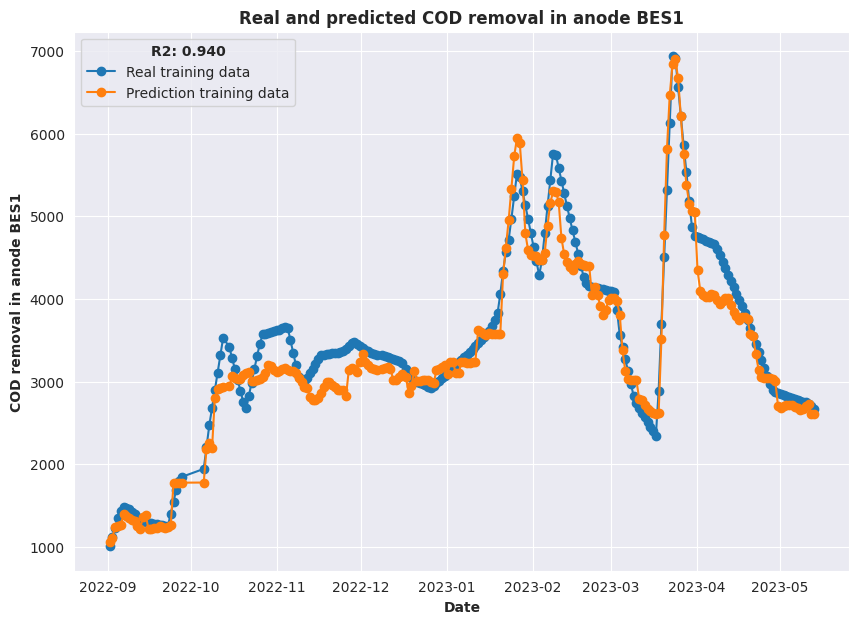

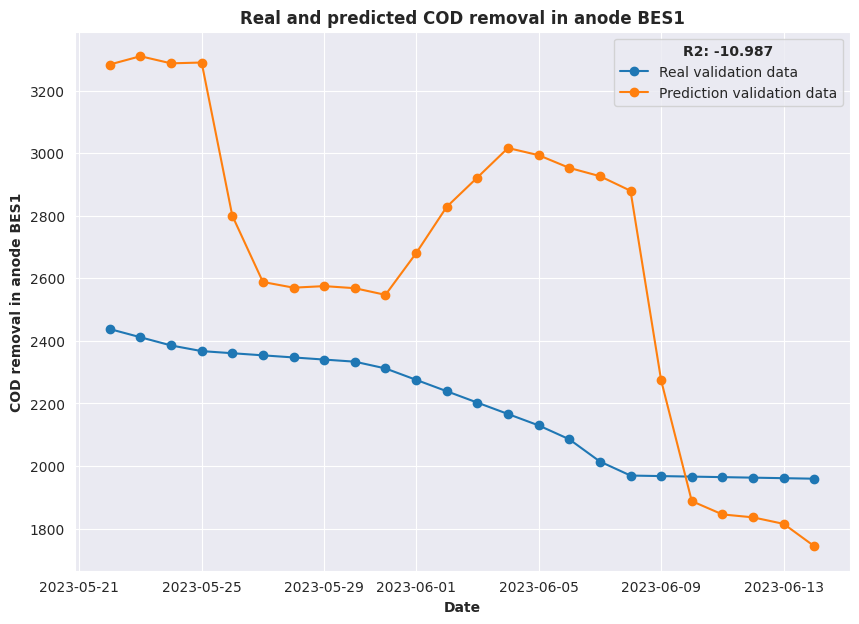

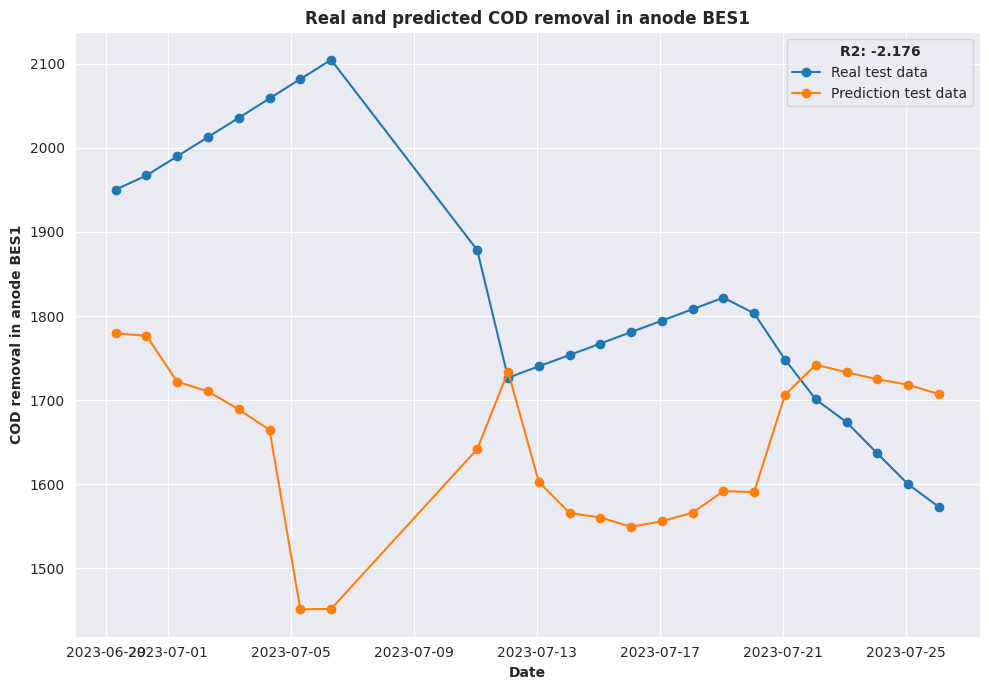

Mean Absolute Error (MAE) Train: 213.85163726051516
Max Error Train: 738.4122265225187
MAPE Train: 0.06105239567426604
Root Mean Squared Error (RMSE) Train: 276.3985798321674
Mean Squared Error (MSE) Train: 76396.174933239
Mean Absolute Error (MAE) Val: 511.7441383829782
Max Error Val: 922.6406157543474
MAPE Val: 0.23224688840804922
Root Mean Squared Error (RMSE): 604.2035034559595
Mean Squared Error (MSE): 365061.87358845567
Mean Absolute Error (MAE) Test: 223.58098507057957
Max Error Test: 652.5297546868828
MAPE Test: 0.11721981638263036
Root Mean Squared Error (RMSE): 273.29135588101656
Mean Squared Error (MSE): 74688.16519928444


In [ ]:
def pred_plot(_y_train, _y_val, _y_test, output_index, number, model, col):
  pred_train = model.predict(X_train) * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  pred_val = model.predict(X_val) * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  # X_test =  X_val
  # y_test = pred_val
  pred_test = model.predict(X_test) * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]

  pred_train = pred_train.flatten()
  pred_val = pred_val.flatten()
  pred_test = pred_test.flatten()

  y_train = _y_train * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  y_val = _y_val * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  y_test = _y_test * (scaler.data_max_[number] - scaler.data_min_[number]) + scaler.data_min_[number]
  # pred_test = y_test
  # Среднее значение predictions по измерению axis 0
  plt.figure(figsize=(10, 7))

  # График для pred_train

  plt.plot(ds30.index[window_size+forecast_horizon - 1:tr:step],  y_train, marker='o', label='Real training data')
  plt.plot(ds30.index[window_size+forecast_horizon - 1:tr:step], pred_train, marker='o', label='Prediction training data')
  #plt.plot(ds30['CODcr(a) Anode Tank'][a[0]][window_size+forecast_horizon - 1:tr],  ds30['CODcr(a) Anode Tank'][a[0]][window_size+forecast_horizon - 1:tr], marker='o', color='red', label='Real training data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_train , pred_train):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  # График для pred_val
  plt.figure(figsize=(10, 7))
  plt.plot(ds30.index[window_size+forecast_horizon- 1 + tr:val:step], y_val, marker='o', label='Real validation data')
  plt.plot(ds30.index[window_size+forecast_horizon - 1 +tr:val:step], pred_val, marker='o', label='Prediction validation data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_val , pred_val):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  # График для pred_test
  plt.figure(figsize=(10, 7))
  plt.plot(ds30.index[window_size+forecast_horizon+val - 1:ts:step], y_test, marker='o', label='Real test data')
  plt.plot(ds30.index[window_size+forecast_horizon+val - 1:ts:step], pred_test, marker='o', label='Prediction test data')
  plt.ylabel(col, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.title(f'Real and predicted {col}', fontweight='bold')
  text = f'R2: {r2_score(y_test, pred_test):.3f}'
  legend = plt.legend(title=text)
  plt.setp(legend.get_title(), fontweight='bold')

  plt.tight_layout()
  plt.show()

  mae = mean_absolute_error(y_train, pred_train)
  maxae = max_error(y_train, pred_train)
  mape= mean_absolute_percentage_error(y_train, pred_train)
  rmse = np.sqrt(mean_squared_error(y_train, pred_train))
  mse = mean_squared_error(y_train, pred_train)

  print("Mean Absolute Error (MAE) Train:", mae)
  print("Max Error Train:", maxae)
  print("MAPE Train:", mape)
  print("Root Mean Squared Error (RMSE) Train:", rmse)
  print("Mean Squared Error (MSE) Train:", mse)

  mae = mean_absolute_error(y_val , pred_val)
  maxae = max_error(y_val , pred_val)
  mape= mean_absolute_percentage_error(y_val, pred_val)
  rmse = np.sqrt(mean_squared_error(y_val , pred_val))
  mse = mean_squared_error(y_val, pred_val)

  print("Mean Absolute Error (MAE) Val:", mae)
  print("Max Error Val:", maxae)
  print("MAPE Val:", mape)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Squared Error (MSE):", mse)

  mae = mean_absolute_error(y_test, pred_test)
  maxae = max_error(y_test, pred_test)
  mape= mean_absolute_percentage_error(y_test, pred_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred_test))
  mse = mean_squared_error(y_test, pred_test)

  print("Mean Absolute Error (MAE) Test:", mae)
  print("Max Error Test:", maxae)
  print("MAPE Test:", mape)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Squared Error (MSE):", mse)

for i in range(features):
  if i == 0:
    pred_plot(y_train1[:, i], y_val1[:, i], y_test1[:, i], i, i, model, 'COD removal in anode BES1')
  if i == 1:
    pred_plot(y_train1[:, i], y_val1[:, i], y_test1[:, i], i, i, model, 'COD in anode tank')

In [ ]:
X_val[:, :, 0].flatten()

array([0.48290934, 0.48353597, 0.48322265, ..., 0.79669638, 0.79747968,
       0.79881128])

In [ ]:
i = 1
tr1 = train_normalized1[:, i].size
val1 = tr + val_normalized1[:, i].size
ts1 = val + test_normalized1[:, i].size

In [ ]:
tr1

18195

In [ ]:
val1

22743

In [ ]:
X_val[:, :72, 0].flatten().shape

(4032,)

In [ ]:
val_normalized1[:, i].shape

(4548,)

In [ ]:
ds30.index[tr1:val1].shape

(4548,)

In [ ]:
ds111.columns

Index(['CODcr(a) Anode Tank', 'outTemp anode storage', 'outCurrent #2',
       'outTemp anode #2', 'outAnode #2', 'outCathode #2', 'Cathode pump #2',
       'Anode pump#2', 'sludge mixing pump', 'Cath tank float',
       'Anode tank float'],
      dtype='object')

In [ ]:
ds111.columns

Index(['CODcr(a) Anode Tank', 'outTemp anode storage', 'outCurrent #2',
       'outTemp anode #2', 'outAnode #2', 'outCathode #2', 'Cathode pump #2',
       'Anode pump#2', 'sludge mixing pump', 'Cath tank float',
       'Anode tank float'],
      dtype='object')

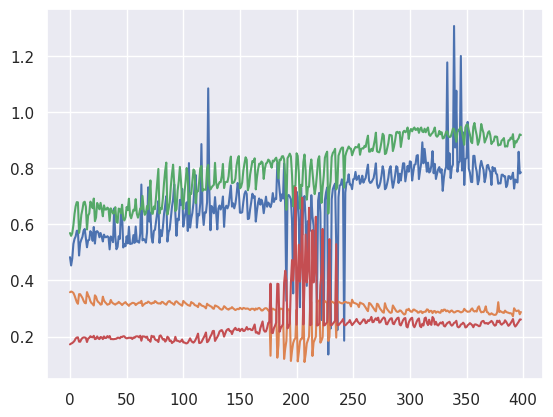

In [ ]:
plt.plot(ds30.index[window_size+forecast_horizon - 1 +tr1:val1:step], X_val[:, :, 0].flatten())

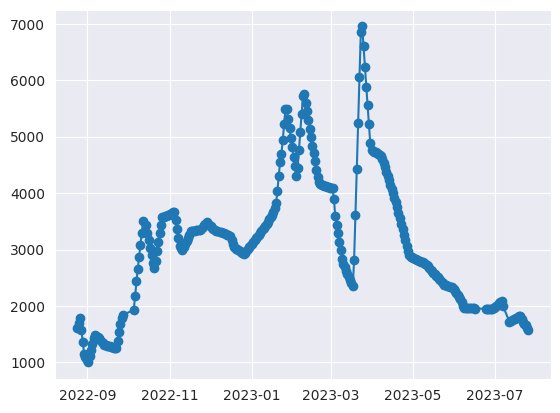

In [ ]:
plt.plot(ds111['CODcr(a) Anode Tank'][::72], marker='o')

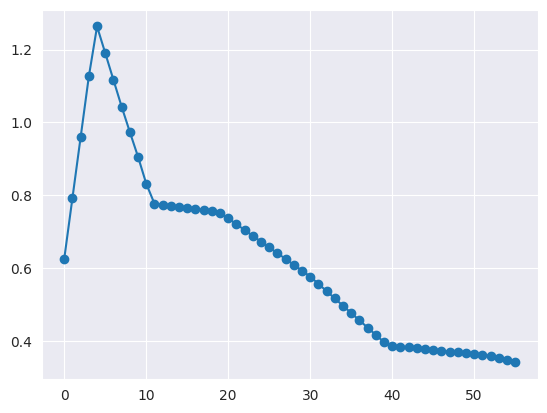

In [ ]:
plt.plot(y_val1[:, 0], marker='o')

In [ ]:
a = pd.DatetimeIndex(['2022-08-24 13:19:38', '2022-08-26 13:19:49', '2022-08-29 13:19:49', '2022-09-01 13:19:49',
                      '2022-09-06 13:19:41', '2022-09-08 13:19:41',
                      '2022-09-13 13:19:34', '2022-09-22 14:17:31', '2022-10-05 13:19:44',
                      '2022-10-07 13:19:39', '2022-10-12 13:19:44', '2022-10-20 13:17:34',
                      '2022-10-26 12:45:32', '2022-11-04 13:35:33', '2022-11-08 13:35:39', '2022-11-10 13:35:30', '2022-11-16 13:35:30', '2022-11-24 13:35:34', '2022-11-28 13:35:44',
               '2022-11-30 13:35:40', '2022-12-09 13:35:33',
               '2022-12-15 12:35:33', '2022-12-19 11:21:32',
               '2022-12-26 11:21:36', '2023-01-10 13:21:34',
               '2023-01-19 11:47:46', '2023-01-26 13:47:31',
               '2023-02-03 13:47:31', '2023-02-08 14:10:31',
               '2023-02-20 14:10:30', '2023-03-02 14:10:31',
               '2023-03-09 13:10:31', '2023-03-17 13:10:37',
               '2023-03-23 14:10:31', '2023-03-30 14:10:30',
               '2023-04-07 14:10:45', '2023-04-18 14:10:45',
               '2023-04-28 14:10:34', '2023-05-10 12:10:34',
               '2023-05-24 14:10:32', '2023-05-30 12:10:43',
               '2023-06-07 14:10:30', '2023-06-29 13:41:46',
               '2023-07-06 13:19:42', '2023-07-11 13:41:46',
               '2023-07-19 13:41:46', '2023-07-26 13:19:33'],
              dtype='datetime64[ns]', name='timestamp', freq=None)
a = a.floor('D')
a = a.normalize()

In [ ]:
a = a.normalize()

In [ ]:
a

DatetimeIndex(['2022-08-24', '2022-08-26', '2022-08-29', '2022-09-01',
               '2022-09-06', '2022-09-08', '2022-09-13', '2022-09-22',
               '2022-10-05', '2022-10-07', '2022-10-12', '2022-10-20',
               '2022-10-26', '2022-11-04', '2022-11-08', '2022-11-10',
               '2022-11-16', '2022-11-24', '2022-11-28', '2022-11-30',
               '2022-12-09', '2022-12-15', '2022-12-19', '2022-12-26',
               '2023-01-10', '2023-01-19', '2023-01-26', '2023-02-03',
               '2023-02-08', '2023-02-20', '2023-03-02', '2023-03-09',
               '2023-03-17', '2023-03-23', '2023-03-30', '2023-04-07',
               '2023-04-18', '2023-04-28', '2023-05-10', '2023-05-24',
               '2023-05-30', '2023-06-07', '2023-06-29', '2023-07-06',
               '2023-07-11', '2023-07-19', '2023-07-26'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [ ]:
data1.shape[1]

3

In [ ]:
X_train.shape, y_train1[:, 0].shape

In [ ]:
seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(100, return_sequences=True)(input_layer)
drop1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(50)(drop1)
drop2 = Dropout(0.1)(lstm2)
dense1 = Dense(128, activation='relu')(drop2)
drop3 = Dropout(0.1)(dense1)
dense2 = Dense(128, activation='relu')(drop3)
drop4 = Dropout(0.2)(dense2)
dense3 = Dense(64, activation='relu')(drop4)
drop4 = Dropout(0.5)(dense3)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop4))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
44/44 - 8s - loss: 0.0961 - mae: 0.2493 - mape: 360.4080 - val_loss: 0.0130 - val_mae: 0.0970 - val_mape: 56.3994 - 8s/epoch - 176ms/step
Epoch 2/500
44/44 - 2s - loss: 0.0455 - mae: 0.1689 - mape: 1009.2744 - val_loss: 0.0156 - val_mae: 0.1164 - val_mape: 66.1399 - 2s/epoch - 53ms/step
Epoch 3/500
44/44 - 3s - loss: 0.0374 - mae: 0.1501 - mape: 786.0803 - val_loss: 0.0201 - val_mae: 0.1308 - val_mape: 75.2509 - 3s/epoch - 78ms/step
Epoch 4/500
44/44 - 3s - loss: 0.0372 - mae: 0.1416 - mape: 320.6300 - val_loss: 0.0105 - val_mae: 0.0909 - val_mape: 47.7599 - 3s/epoch - 61ms/step
Epoch 5/500
44/44 - 2s - loss: 0.0339 - mae: 0.1388 - mape: 278.3418 - val_loss: 0.0094 - val_mae: 0.0851 - val_mape: 46.7580 - 2s/epoch - 55ms/step
Epoch 6/500
44/44 - 2s - loss: 0.0317 - mae: 0.1403 - mape: 139.4486 - val_loss: 0.0140 - val_mae: 0.1067 - val_mape: 58.4612 - 2s/epoch - 53ms/step
Epoch 7/500
44/44 - 2s - loss: 0.0284 - mae: 0.1255 - mape: 780.7899 - val_loss: 0.0116 - val_mae: 0.086

In [ ]:
from keras.losses import Huber

In [ ]:
from keras.losses import MeanSquaredError, MeanAbsoluteError, LogCosh

In [ ]:
data1.shape[1]-1

17

In [ ]:

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(100)(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(100)(repeat)
drop2 = Dropout(0.2)(lstm2)
# dense1 = Dense(64, activation='relu')(drop2)
# drop3 = Dropout(0.5)(dense1)
# dense2 = Dense(150, activation='relu')(dense1)
# dense3 = Dense(75, activation='relu')(dense2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=2, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
125/125 - 12s - loss: 0.0248 - mae: 0.1095 - mape: 352.6382 - val_loss: 0.0157 - val_mae: 0.1245 - val_mape: 63.6604 - 12s/epoch - 94ms/step
Epoch 2/100
125/125 - 5s - loss: 0.0184 - mae: 0.0955 - mape: 296.3990 - val_loss: 0.0300 - val_mae: 0.1711 - val_mape: 87.4528 - 5s/epoch - 42ms/step
Epoch 3/100
125/125 - 6s - loss: 0.0133 - mae: 0.0812 - mape: 234.7662 - val_loss: 0.0039 - val_mae: 0.0556 - val_mape: 27.1094 - 6s/epoch - 46ms/step
Epoch 4/100
125/125 - 8s - loss: 0.0142 - mae: 0.0840 - mape: 1136.2155 - val_loss: 0.0024 - val_mae: 0.0430 - val_mape: 21.6471 - 8s/epoch - 66ms/step
Epoch 5/100
125/125 - 5s - loss: 0.0139 - mae: 0.0829 - mape: 86.9818 - val_loss: 0.0034 - val_mae: 0.0530 - val_mape: 26.2255 - 5s/epoch - 44ms/step
Epoch 6/100
125/125 - 6s - loss: 0.0120 - mae: 0.0773 - mape: 290.1355 - val_loss: 9.7478e-04 - val_mae: 0.0257 - val_mape: 13.9204 - 6s/epoch - 47ms/step
Epoch 7/100
125/125 - 5s - loss: 0.0128 - mae: 0.0756 - mape: 73.5581 - val_loss: 0.0053

In [ ]:

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
conv1d = Conv1D(150, 27, activation='relu', padding='same')(input_layer)
# drop1 = Dropout(0.3)(conv1d)
max1 = MaxPooling1D(9)(conv1d)
# conv1d1 = Conv1D(50, 9, activation='relu', padding='same')(max1)
# drop3 = Dropout(0.2)(conv1d1)
# max2 = MaxPooling1D(9)(drop3)
lstm1 = LSTM(100)(max1)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(100)(repeat)
drop2 = Dropout(0.2)(lstm2)
# dense1 = Dense(64, activation='relu')(drop2)
# drop3 = Dropout(0.5)(dense1)
# dense2 = Dense(150, activation='relu')(dense1)
# dense3 = Dense(75, activation='relu')(dense2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=50, batch_size=2, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/50
123/123 - 8s - loss: 0.0287 - mae: 0.1223 - mape: 138.0391 - val_loss: 0.0321 - val_mae: 0.1779 - val_mape: 95.8888 - 8s/epoch - 63ms/step
Epoch 2/50
123/123 - 3s - loss: 0.0190 - mae: 0.1024 - mape: 50.0425 - val_loss: 0.0175 - val_mae: 0.1307 - val_mape: 69.0274 - 3s/epoch - 23ms/step
Epoch 3/50
123/123 - 3s - loss: 0.0156 - mae: 0.0890 - mape: 34.8357 - val_loss: 0.0216 - val_mae: 0.1445 - val_mape: 76.0270 - 3s/epoch - 23ms/step
Epoch 4/50
123/123 - 3s - loss: 0.0140 - mae: 0.0835 - mape: 49.6329 - val_loss: 0.0025 - val_mae: 0.0433 - val_mape: 22.2290 - 3s/epoch - 23ms/step
Epoch 5/50
123/123 - 3s - loss: 0.0149 - mae: 0.0858 - mape: 32.6194 - val_loss: 0.0046 - val_mae: 0.0635 - val_mape: 33.1268 - 3s/epoch - 27ms/step
Epoch 6/50
123/123 - 3s - loss: 0.0163 - mae: 0.0911 - mape: 54.2523 - val_loss: 0.0026 - val_mae: 0.0433 - val_mape: 22.5788 - 3s/epoch - 24ms/step
Epoch 7/50
123/123 - 3s - loss: 0.0131 - mae: 0.0783 - mape: 52.9846 - val_loss: 0.0145 - val_mae: 0.1111

In [ ]:
input_layer = Input(shape=(window_size, data1.shape[1]-1))
conv1d = Conv1D(256, 45, activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.5)(conv1d)
max1 = MaxPooling1D(9)(drop1)

lstm1 = LSTM(128, return_sequences=True)(max1)
lstm2 = LSTM(128, return_sequences=True)(lstm1)
lstm3 = LSTM(64, return_sequences=True)(lstm2)
lstm4 = LSTM(64)(lstm3)
drop2 = Dropout(0.5)(lstm4)

outputs = []
for i in range(features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))

model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])

histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=300, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/300
44/44 - 9s - loss: 0.0775 - mae: 0.2229 - mape: 1738.0297 - val_loss: 0.0173 - val_mae: 0.1183 - val_mape: 55.4297 - 9s/epoch - 200ms/step
Epoch 2/300
44/44 - 1s - loss: 0.0281 - mae: 0.1253 - mape: 95.1342 - val_loss: 0.0663 - val_mae: 0.2407 - val_mape: 103.2432 - 671ms/epoch - 15ms/step
Epoch 3/300
44/44 - 1s - loss: 0.0207 - mae: 0.1121 - mape: 260.5020 - val_loss: 0.0545 - val_mae: 0.2234 - val_mape: 95.1752 - 666ms/epoch - 15ms/step
Epoch 4/300
44/44 - 1s - loss: 0.0193 - mae: 0.1096 - mape: 977.6431 - val_loss: 0.0414 - val_mae: 0.1938 - val_mape: 83.1492 - 673ms/epoch - 15ms/step
Epoch 5/300
44/44 - 1s - loss: 0.0155 - mae: 0.0954 - mape: 483.5252 - val_loss: 0.0692 - val_mae: 0.2475 - val_mape: 103.5389 - 574ms/epoch - 13ms/step
Epoch 6/300
44/44 - 1s - loss: 0.0165 - mae: 0.0980 - mape: 133.8353 - val_loss: 0.0349 - val_mae: 0.1791 - val_mape: 76.4096 - 668ms/epoch - 15ms/step
Epoch 7/300
44/44 - 1s - loss: 0.0201 - mae: 0.1090 - mape: 887.6942 - val_loss: 0.0438 

KeyboardInterrupt: ignored

In [ ]:

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
# conv1d = Conv1D(150, 9, activation='relu', padding='same')(input_layer)
# max1 = MaxPooling1D(9)(conv1d)
lstm1 = LSTM(100, return_sequences=True)(input_layer)
drop1 = Dropout(0.1)(lstm1)
lstm2 = LSTM(100, return_sequences=True)(drop1)
drop2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(50)(drop2)
drop3 = Dropout(0.5)(lstm3)
#dense1 = Dense(100, activation='relu')(drop3)
# lstm4 = LSTM(50, return_sequences=True)(drop3)
# drop4 = Dropout(0.2)(lstm4)
# lstm5 = LSTM(50)(drop4)
# drop5 = Dropout(0.2)(lstm5)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=500, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/500
50/50 - 8s - loss: 0.0515 - mae: 0.1673 - mape: 409.6251 - val_loss: 0.0287 - val_mae: 0.1646 - val_mape: 107.0325 - 8s/epoch - 161ms/step
Epoch 2/500
50/50 - 1s - loss: 0.0275 - mae: 0.1279 - mape: 467.1838 - val_loss: 0.0267 - val_mae: 0.1548 - val_mape: 100.4226 - 1s/epoch - 23ms/step
Epoch 3/500
50/50 - 1s - loss: 0.0295 - mae: 0.1337 - mape: 327.9519 - val_loss: 0.0232 - val_mae: 0.1364 - val_mape: 90.3296 - 1s/epoch - 23ms/step
Epoch 4/500
50/50 - 1s - loss: 0.0269 - mae: 0.1242 - mape: 639.6690 - val_loss: 0.0171 - val_mae: 0.1079 - val_mape: 67.4986 - 1s/epoch - 24ms/step
Epoch 5/500
50/50 - 1s - loss: 0.0277 - mae: 0.1291 - mape: 565.6846 - val_loss: 0.0312 - val_mae: 0.1702 - val_mape: 109.5996 - 1s/epoch - 23ms/step
Epoch 6/500
50/50 - 1s - loss: 0.0257 - mae: 0.1256 - mape: 671.1807 - val_loss: 0.0360 - val_mae: 0.1778 - val_mape: 114.8479 - 1s/epoch - 23ms/step
Epoch 7/500
50/50 - 1s - loss: 0.0232 - mae: 0.1143 - mape: 109.3351 - val_loss: 0.0539 - val_mae: 0.

In [ ]:

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(100, return_sequences=True)(input_layer)
lstm2 = LSTM(50, return_sequences=True)(lstm1)
lstm3 = LSTM(50)(lstm2)
dense1 = Dense(100, activation='relu')(lstm3)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(dense1))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
303/303 - 21s - loss: 0.0279 - mae: 0.1238 - mape: 265.0981 - val_loss: 0.0603 - val_mae: 0.1897 - val_mape: 34.6649 - 21s/epoch - 69ms/step
Epoch 2/100
303/303 - 11s - loss: 0.0175 - mae: 0.0986 - mape: 52.7777 - val_loss: 0.0594 - val_mae: 0.1979 - val_mape: 39.0072 - 11s/epoch - 36ms/step
Epoch 3/100
303/303 - 11s - loss: 0.0162 - mae: 0.0937 - mape: 80.0443 - val_loss: 0.0671 - val_mae: 0.1978 - val_mape: 32.6233 - 11s/epoch - 37ms/step
Epoch 4/100
303/303 - 12s - loss: 0.0156 - mae: 0.0914 - mape: 73.5649 - val_loss: 0.0635 - val_mae: 0.2036 - val_mape: 37.0609 - 12s/epoch - 39ms/step
Epoch 5/100
303/303 - 12s - loss: 0.0150 - mae: 0.0872 - mape: 68.9700 - val_loss: 0.0626 - val_mae: 0.1949 - val_mape: 33.5323 - 12s/epoch - 39ms/step
Epoch 6/100
303/303 - 12s - loss: 0.0147 - mae: 0.0875 - mape: 54.8856 - val_loss: 0.0628 - val_mae: 0.1891 - val_mape: 33.3446 - 12s/epoch - 40ms/step
Epoch 7/100
303/303 - 12s - loss: 0.0129 - mae: 0.0801 - mape: 61.4268 - val_loss: 0.05

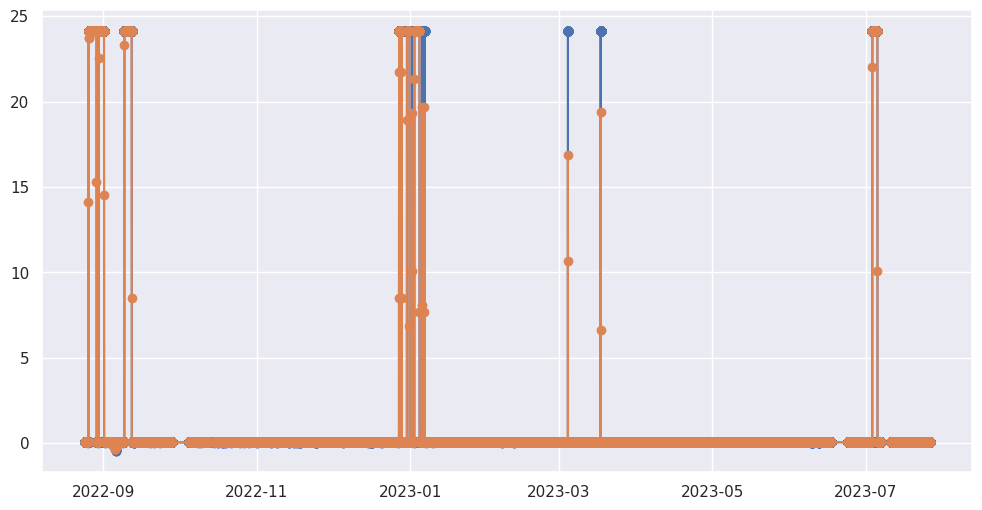

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ds1['Anode tank float'], marker='o')
ax.plot(ds111['Anode tank float'], marker='o')

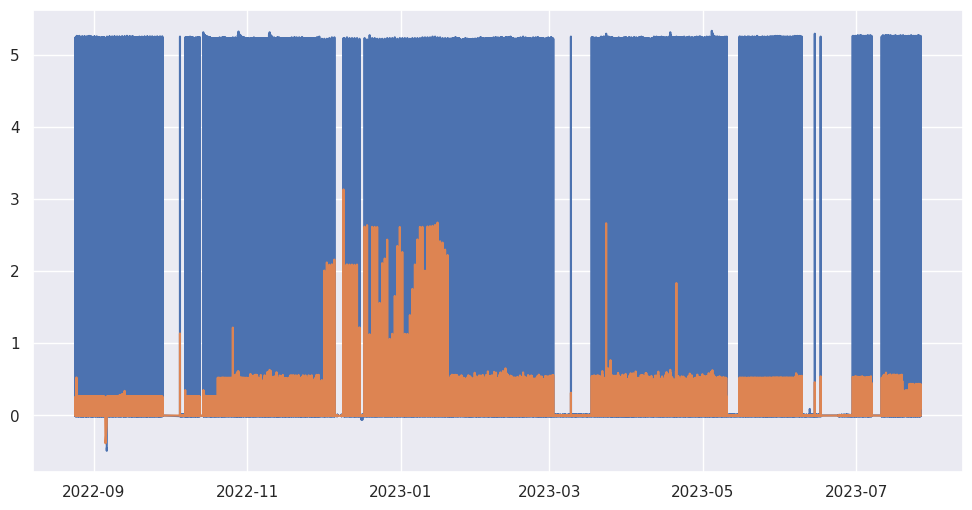

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ds1['Cathode pump #2'])
ax.plot(ds111['Cathode pump #2'])

In [ ]:
ds1['CODcr(a) Anode Tank'].mean()

2962.340425531915

In [ ]:
ds1['CODcr(a) Anode Tank'].mean()

2962.340425531915

In [ ]:
ds1['CODcr(a) #2-out'']

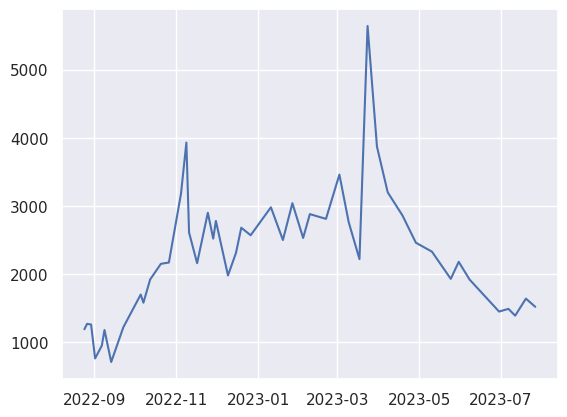

In [ ]:
plt.plot(ds1['CODcr(a) #2-out'].dropna())

In [ ]:

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(150)(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(150)(repeat)
drop2 = Dropout(0.2)(lstm2)
Dense1 = Dense(100, activation='relu')(drop2)
Dense2 = Dense(50, activation='relu')(Dense1)
drop3 = Dropout(0.2)(Dense2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop3))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=200, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/200
44/44 - 6s - loss: 0.0432 - mae: 0.1551 - mape: 532.7692 - val_loss: 0.0372 - val_mae: 0.1867 - val_mape: 79.4060 - 6s/epoch - 135ms/step
Epoch 2/200
44/44 - 1s - loss: 0.0166 - mae: 0.0956 - mape: 197.8625 - val_loss: 0.0246 - val_mae: 0.1486 - val_mape: 63.0608 - 713ms/epoch - 16ms/step
Epoch 3/200
44/44 - 1s - loss: 0.0152 - mae: 0.0918 - mape: 283.6942 - val_loss: 0.0271 - val_mae: 0.1552 - val_mape: 65.0931 - 718ms/epoch - 16ms/step
Epoch 4/200
44/44 - 1s - loss: 0.0125 - mae: 0.0788 - mape: 265.9056 - val_loss: 0.0339 - val_mae: 0.1688 - val_mape: 70.3162 - 780ms/epoch - 18ms/step
Epoch 5/200
44/44 - 1s - loss: 0.0110 - mae: 0.0756 - mape: 92.1718 - val_loss: 0.0206 - val_mae: 0.1289 - val_mape: 53.6288 - 795ms/epoch - 18ms/step
Epoch 6/200
44/44 - 1s - loss: 0.0116 - mae: 0.0782 - mape: 205.1381 - val_loss: 0.0190 - val_mae: 0.1238 - val_mape: 51.2817 - 715ms/epoch - 16ms/step
Epoch 7/200
44/44 - 1s - loss: 0.0142 - mae: 0.0882 - mape: 292.2863 - val_loss: 0.0179 - v

In [ ]:

seed_value = 13
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)


input_layer = Input(shape=(window_size, data1.shape[1]-1))
lstm1 = LSTM(100)(input_layer)
repeat = RepeatVector(10)(lstm1)
lstm2 = LSTM(100)(repeat)
drop2 = Dropout(0.2)(lstm2)
outputs = []
for i in range(0, features):
  outputs.append(Dense(1, activation='linear', name='output{}'.format(i))(drop2))
model = Model(inputs=input_layer, outputs=outputs)

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])


histories = model.fit(X_train, [y_train1[:, i] for i in range(features)], epochs=100, batch_size=5, verbose=2, validation_data=(X_val, [y_val1[:, i] for i in range(features)]))

Epoch 1/100
43/43 - 5s - loss: 0.0798 - mae: 0.2203 - mape: 206.8689 - val_loss: 0.0117 - val_mae: 0.0915 - val_mape: 44.6198 - 5s/epoch - 116ms/step
Epoch 2/100
43/43 - 1s - loss: 0.0308 - mae: 0.1365 - mape: 130.0573 - val_loss: 0.0141 - val_mae: 0.1109 - val_mape: 50.4469 - 1s/epoch - 26ms/step
Epoch 3/100
43/43 - 1s - loss: 0.0258 - mae: 0.1215 - mape: 83.0199 - val_loss: 0.0330 - val_mae: 0.1753 - val_mape: 78.2670 - 1s/epoch - 28ms/step
Epoch 4/100
43/43 - 1s - loss: 0.0274 - mae: 0.1327 - mape: 127.4162 - val_loss: 0.0227 - val_mae: 0.1422 - val_mape: 64.5962 - 1s/epoch - 25ms/step
Epoch 5/100
43/43 - 1s - loss: 0.0242 - mae: 0.1193 - mape: 96.6922 - val_loss: 0.0201 - val_mae: 0.1349 - val_mape: 59.6645 - 932ms/epoch - 22ms/step
Epoch 6/100
43/43 - 1s - loss: 0.0221 - mae: 0.1157 - mape: 44.7373 - val_loss: 0.0258 - val_mae: 0.1539 - val_mape: 68.8816 - 893ms/epoch - 21ms/step
Epoch 7/100
43/43 - 1s - loss: 0.0245 - mae: 0.1219 - mape: 95.4976 - val_loss: 0.0357 - val_mae: 0.18

In [ ]:
for i in ds1.columns:
  print(i)

In [ ]:
plt.plot(ds1['CODcr(a) Anode Tank'].dropna().index, ds1['CODcr(a) Anode Tank'].dropna().values)

In [ ]:
data1.shape

(22744, 11)

In [ ]:
X_train.shape

(249, 216, 10)

In [ ]:
y_train1.shape

(249, 1)

In [ ]:
train_normalized1.shape

(18195, 11)

In [ ]:
from darts import TimeSeries

X_train = [TimeSeries.from_values(train_normalized1[:, i]) for i in range(1, 11)]
y_train1 = TimeSeries.from_values(train_normalized1[:, 0])

X_val = [TimeSeries.from_values(val_normalized1[:, i]) for i in range(1, 11)]
y_val1 = TimeSeries.from_values(val_normalized1[:, 0])

In [ ]:
from darts.models import ExponentialSmoothing

In [ ]:
X_train

[<TimeSeries (DataArray) (time: 18195, component: 1, sample: 1)>
 array([[[0.83539104]],
 
        [[0.83672264]],
 
        [[0.83836756]],
 
        ...,
 
        [[0.4836143 ]],
 
        [[0.48259602]],
 
        [[0.48267435]]])
 Coordinates:
   * time       (time) int64 0 1 2 3 4 5 ... 18189 18190 18191 18192 18193 18194
   * component  (component) <U1 '0'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (time: 18195, component: 1, sample: 1)>
 array([[[0.44919649]],
 
        [[0.44919649]],
 
        [[0.4494446 ]],
 
        ...,
 
        [[0.35888456]],
 
        [[0.35838834]],
 
        [[0.35814023]]])
 Coordinates:
   * time       (time) int64 0 1 2 3 4 5 ... 18189 18190 18191 18192 18193 18194
   * component  (component) <U1 '0'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (time: 18195, c

In [ ]:
pip install u8darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.8/817.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.4/110.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
pip install statsforecast==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: statsforecast
    Found existing installation: statsforecast 1.7.0
    Uninstalling statsforecast-1.7.0:
      Successfully uninstalled statsforecast-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
u8darts 0.27.1 requires statsforecast>=1.4, but you have statsforecast 0.6.0 which is incompatible.
